<!--
still to do:
main dataset clustering - need to decide on dataset
recommendation engine real world example
-->

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.cluster.hierarchy import dendrogram, linkage
import kneed
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from mpl_toolkits import mplot3d
from sklearn import preprocessing

# Unsupervised Learning
Unsupervised learning takes unlabeled data and finds relationships and structures in the data. For example, unsupervised learning may be used to look at shopping habits of people who shop at Amazon and divide those people into groups that behave similarly. Unlike supervised learning, unsupervised learning has input variables, but no output variable. Because the data used in unsupervised learning is not labeled, there is no measure of accuracy for the results of unsupervised learning.

**The Challenge of Unsupervised Learning**

Because unsupervised learning has no specific goal, it is more subjective than supervised learning. There is no accepted method to cross-validate findings from unsupervised learning. This makes it difficult to define measures of success. Despite these difficulties, unsupervised learning can provide useful insight into the data that is analyzed.

# Clustering

## Background Reading

**Suggested Reading:**

*Intro to Statistical Learning* 12.1, 12.4; 

*Ethical Algorithm* pg 116-123

## Essence of Data
Clustering is used to see if the data can be divided into relatively distinct subgroups, or clusters. The goal is to find a way to assign each data point to a subgroup such that observations in the same group are more similar than observations in different groups. Two popular clustering methods are K-Means Clustering and Hierarchical Clustering. Other types of clustering include distribution-based methods, density models, and subspace clustering.

**K-Means Clustering**
K-Means Clustering splits the data into K distinct groups such that every data point belongs to exactly one group. A good split will have low within-cluster variation (W), meaning that the observations within each cluster are similar. One way to quantify within-cluster variation is the squared Euclidian distance, defined below.
<div>
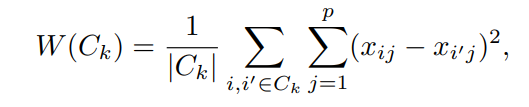
</div>

In this equation, |Ck| represents the number of observations in each cluster. Thus, the formula is taking the average distance between all pairs of data points in the cluster. The goal is then to divide the observations into clusters in a way that minimizes the sum of the within-cluster variation across all clusters, as shown below.
<div>
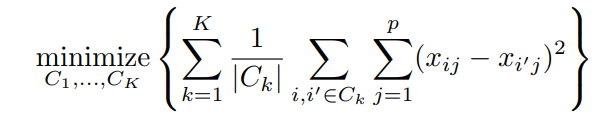
</div>

**How does K-Means clustering work?**
For a dataset of n observations, there are almost K^n ways to divide the observations into K cluters. Clearly, for large datasets, it is not feasible to test every different case. Instead, the K-Means Clustering Algorithm can be used to find a local optimum. While this may not be the absolute optimal solution, it will still be good enough to derive insights from the data.

<div>
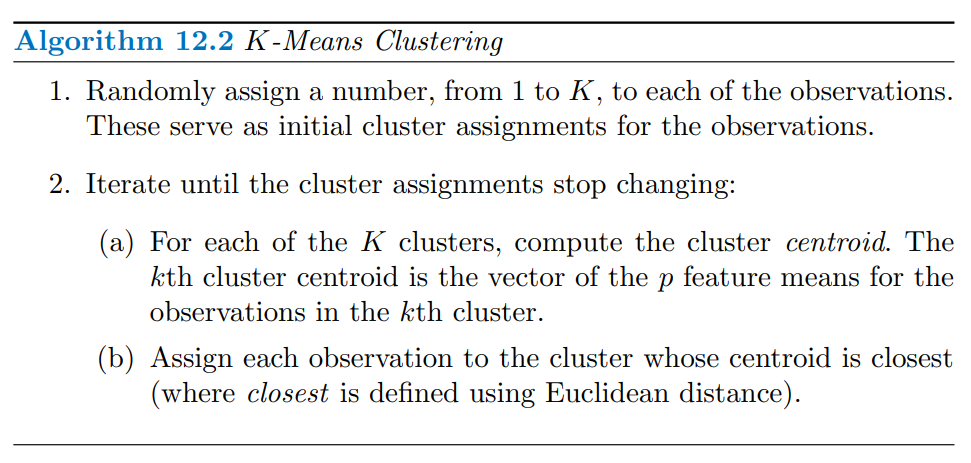
</div>

This algorithm is demonstrated below. First, we will create 50 random data points with 2 attributes.

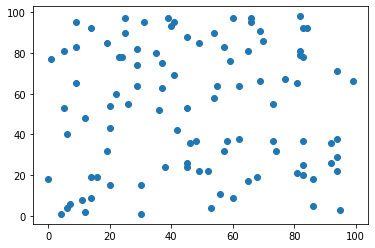

In [3]:
#create 50 observations, each with 2 attributes (random integers between 0 and 100)
df = pd.DataFrame(np.random.randint(0,100,size=(100, 2)), columns=list('AB'))
plt.scatter(df['A'], df['B'])
plt.show()

Now that we have our randomly generated data, we will randomly assign each point to a cluster. In this case we are using 4 clusters. Then, we will compute the centroid of each cluster and reasssign each point to whichever cluster's centroid it is closest to. Then we will repeat the process by recalculating the centroids and reassigning the data points.

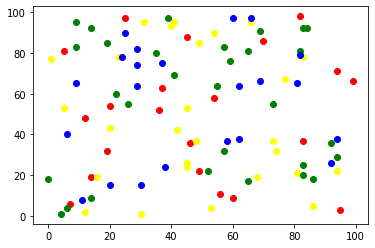

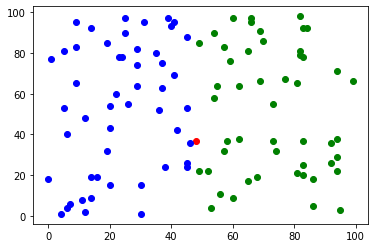

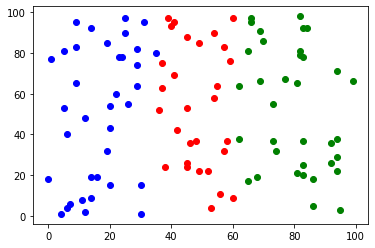

In [4]:
#We will be using K=4 clusters. First, randomly assign each point to a cluster.
df['Cluster']=''
for i in range(0,len(df['A'])):
    df.loc[i,'Cluster']=np.random.randint(1,5)

#plot the data
plt.scatter(df.loc[df['Cluster']==1]['A'],df.loc[df['Cluster']==1]['B'], c='red')
plt.scatter(df.loc[df['Cluster']==2]['A'],df.loc[df['Cluster']==2]['B'], c='yellow')
plt.scatter(df.loc[df['Cluster']==3]['A'],df.loc[df['Cluster']==3]['B'], c='green')
plt.scatter(df.loc[df['Cluster']==4]['A'],df.loc[df['Cluster']==4]['B'], c='blue')
plt.show()

#compute cluster centroids
centroid1=(df.loc[df['Cluster']==1]['A'].mean(),df.loc[df['Cluster']==1]['B'].mean())
centroid2=(df.loc[df['Cluster']==2]['A'].mean(),df.loc[df['Cluster']==2]['B'].mean())
centroid3=(df.loc[df['Cluster']==3]['A'].mean(),df.loc[df['Cluster']==3]['B'].mean())
centroid4=(df.loc[df['Cluster']==4]['A'].mean(),df.loc[df['Cluster']==4]['B'].mean())
#reassign points to whichever cluster's centroid they are closest to
for i in range(0,len(df['A'])):
    dist1=math.sqrt((df.loc[i,'A']-centroid1[0])**2+(df.loc[i,'A']-centroid1[0])**2)
    dist2=math.sqrt((df.loc[i,'A']-centroid2[0])**2+(df.loc[i,'A']-centroid2[0])**2)
    dist3=math.sqrt((df.loc[i,'A']-centroid3[0])**2+(df.loc[i,'A']-centroid3[0])**2)
    dist4=math.sqrt((df.loc[i,'A']-centroid4[0])**2+(df.loc[i,'A']-centroid4[0])**2)
    if dist1==min(dist1,dist2,dist3,dist4):
        df.loc[i,'Cluster']=1
    elif dist2==min(dist1,dist2,dist3,dist4):
        df.loc[i,'Cluster']=2
    elif dist3==min(dist1,dist2,dist3,dist4):
        df.loc[i,'Cluster']=3
    else:
        df.loc[i,'Cluster']=4
#plot the data
plt.scatter(df.loc[df['Cluster']==1]['A'],df.loc[df['Cluster']==1]['B'], c='red')
plt.scatter(df.loc[df['Cluster']==2]['A'],df.loc[df['Cluster']==2]['B'], c='yellow')
plt.scatter(df.loc[df['Cluster']==3]['A'],df.loc[df['Cluster']==3]['B'], c='green')
plt.scatter(df.loc[df['Cluster']==4]['A'],df.loc[df['Cluster']==4]['B'], c='blue')
plt.show()

#repeat
#compute cluster centroids
centroid1=(df.loc[df['Cluster']==1]['A'].mean(),df.loc[df['Cluster']==1]['B'].mean())
centroid2=(df.loc[df['Cluster']==2]['A'].mean(),df.loc[df['Cluster']==2]['B'].mean())
centroid3=(df.loc[df['Cluster']==3]['A'].mean(),df.loc[df['Cluster']==3]['B'].mean())
centroid4=(df.loc[df['Cluster']==4]['A'].mean(),df.loc[df['Cluster']==4]['B'].mean())
#reassign points to whichever cluster's centroid they are closest to
for i in range(0,len(df['A'])):
    dist1=math.sqrt((df.loc[i,'A']-centroid1[0])**2+(df.loc[i,'A']-centroid1[0])**2)
    dist2=math.sqrt((df.loc[i,'A']-centroid2[0])**2+(df.loc[i,'A']-centroid2[0])**2)
    dist3=math.sqrt((df.loc[i,'A']-centroid3[0])**2+(df.loc[i,'A']-centroid3[0])**2)
    dist4=math.sqrt((df.loc[i,'A']-centroid4[0])**2+(df.loc[i,'A']-centroid4[0])**2)
    if dist1==min(dist1,dist2,dist3,dist4):
        df.loc[i,'Cluster']=1
    elif dist2==min(dist1,dist2,dist3,dist4):
        df.loc[i,'Cluster']=2
    elif dist3==min(dist1,dist2,dist3,dist4):
        df.loc[i,'Cluster']=3
    else:
        df.loc[i,'Cluster']=4
#plot the data
plt.scatter(df.loc[df['Cluster']==1]['A'],df.loc[df['Cluster']==1]['B'], c='red')
plt.scatter(df.loc[df['Cluster']==2]['A'],df.loc[df['Cluster']==2]['B'], c='yellow')
plt.scatter(df.loc[df['Cluster']==3]['A'],df.loc[df['Cluster']==3]['B'], c='green')
plt.scatter(df.loc[df['Cluster']==4]['A'],df.loc[df['Cluster']==4]['B'], c='blue')
plt.show()

Because this clustering algorith finds a local rather than global maximum, it can result in different outputs each time it's run. Furthermore, the final clusters will depend on the initial, randomly assigned, starting clusters. To deal with this, you should run the algorithm multiple times with different starting conditions, and choose the best clustering scheme of all the results.

This data was generated randomly, so it will not naturally fall into clusters. Real-life data will likely be less random. In this code, there is no written constraint to maintain the initial number of clusters. Thus, some scenarios will result in fewer than four clusters.

**Hierarchical Clustering**

Hierarchical clustering is a clustering method that does not force the user to specify the number of clusters. Instead, hierarichal clustering results in a dendogram that shows what the clusters would be at different numbers of clusters. The dendogram is created by looking at the dissimilarity of each pair of observations. The two that are the least dissimilar are fused. Then the dissimilarity between all pairs of observations (or fused observations) is recalculated, and the two least dissimilar are fused. The process continues until there is only one group.

A sample dendrogram based on randomly generated data is shown below.

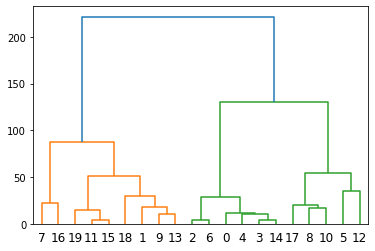

In [5]:
#create 2 lists of 20 random integers between 0 and 100
x=[np.random.randint(0,100) for i in range(0,20)]
y=[np.random.randint(0,100) for i in range(0,20)]
#combine the two lists
data=list(zip(x,y))
#create the dendogram
linkage_data = linkage(data, method='ward', metric='euclidean')
dendrogram(linkage_data)
plt.show()

**Interpreting the Dendogram**

The numbers on the horizontal axis of the graph represent the initial order of each observation. The height at which two observations fuse indicates how similar the two points are. The lower the fuse point, the more similar the observations. Note that the horizontal proximity of two points does not reflect their similarity. For example, two points may be adjacent,but not fuse until relatively high on the plot.

By making a horizontal cut on the dendogram, you can see what the clusters would be for that number of clusters. A lower cut will result in a higher number of clusters. Thus instead of running K-Means clustering on a variety of different K values, you could create a dendogram and visualize the split of the data into different numbers of clusters.

Hierarchical clustering is less scalable than k-means clustering, and it can suffer from not being able to go back and undo previous steps because it is an agglomerative method.

**Calculating Dissimilarity**

For two points, the dissimilarity can be easily calculated by taking the Euclidian distance between them. This task becomes more difficult when assessing the dissimilarity between a point and a cluster of points, or between two clusters of points. In these cases, linkage is used. Linkage specifies how the dissimilarity can be calculated based on the distance between observations in a cluster. The four most commonly used types of linkage are shown below.
<div>
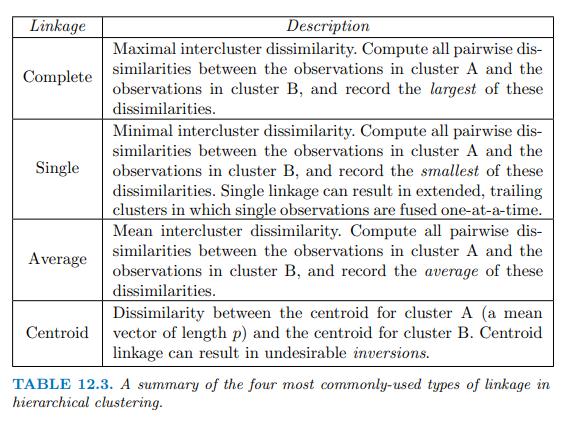
</div>


# Dataset:

This artificial dataset describes credit card related behavior for about 9000 credit card holders measured across 18 behavioral variables. The dataset and data dictionary are available here: https://www.kaggle.com/datasets/arjunbhasin2013/ccdata

We will be looking at different ways to cluster this data.


In [6]:
data=pd.read_csv(r'../../../data/creditdata.csv')
%matplotlib inline
#%matplotlib notebook -- run this line instead of the above line if you want to be able to rotate the plots in jupyter
data.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

I will choose three features to look at, because I want to be able to visualize the data for the example. You could perofrm clustering using any number of attributes, and would likely get more useful results by using more features. I tried to choose features that would be somewhat uncorrellated, in order to get the best representation of the data through three attributes. 

In [7]:
df=data[['BALANCE','PURCHASES_FREQUENCY','TENURE']]

Start by looking at the data graphically.

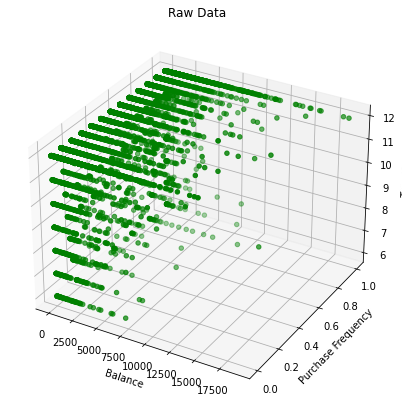

In [8]:
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(df['BALANCE'], df['PURCHASES_FREQUENCY'], df['TENURE'], color = "green")
plt.title('Raw Data')
plt.xlabel('Balance')
plt.ylabel('Purchase Frequency')
ax.set_zlabel('Tenure')
 
# show plot
plt.show()


If we look at the axes, the three variables are measured on very different scales. For this analysis, I will normalize the data on a 0-1 scale.

In [9]:
#normalize the data using minmaxscaler
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(df)
df = pd.DataFrame(x_scaled,columns=['BALANCE','PURCHASES_FREQUENCY','TENURE'])
#make a copy of the data
primarydf=df.copy()

Now we can plot the data again and see that the axes are all on the same scale.

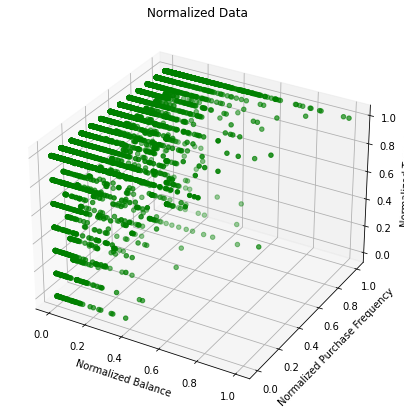

In [10]:
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(df['BALANCE'], df['PURCHASES_FREQUENCY'], df['TENURE'], color = "green")
plt.title('Normalized Data')
plt.xlabel('Normalized Balance')
plt.ylabel('Normalized Purchase Frequency')
ax.set_zlabel('Normalized Tenure')
 
# show plot
plt.show()

Now we need to decide how many clusters we want. We will look at the distortion graph for different numbers of clusters. Based on this graph, we should choose the number of clusters that corresponds to the point of the graph that is the elbow. The elbow is the last point before the distortion begins decreasing linearly. It represents the maximum number of clusters before adding more clusters has diminishing returns.

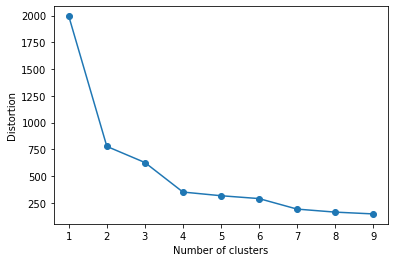

In [11]:
distortions = []
for i in range(1, 10):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(df)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 10),distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

It is unclear where exactly the elbow is on the above graph. It looks like it could be at 2 or 4, but to know for sure, we will calculate the sillhouette score for each different number of clusters. You can read more about the sillhouette score here: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

In [12]:
for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(df)
    label = kmeans.labels_
    sil_coeff = silhouette_score(df, label, metric='euclidean')
    #we can use euclidian distance because the data has been noralized
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

C:\Users\Lenovo\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=2, The Silhouette Coefficient is 0.5739295835053959


C:\Users\Lenovo\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=3, The Silhouette Coefficient is 0.6116411834519596


C:\Users\Lenovo\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=4, The Silhouette Coefficient is 0.5388424113159652


C:\Users\Lenovo\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=5, The Silhouette Coefficient is 0.56219666435885


C:\Users\Lenovo\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=6, The Silhouette Coefficient is 0.4887106539304702


C:\Users\Lenovo\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=7, The Silhouette Coefficient is 0.4977227504521803


C:\Users\Lenovo\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=8, The Silhouette Coefficient is 0.49570836545000907


C:\Users\Lenovo\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=9, The Silhouette Coefficient is 0.49010452060586496


C:\Users\Lenovo\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=10, The Silhouette Coefficient is 0.505608665791637


The highest sillhouette score occurs with 3 clusters, so that is the mathematically ideal number of clusters. The actual best number of clusters will depend on the context of the data. We will look at clustering the data into 4,3, and 2 clusters.

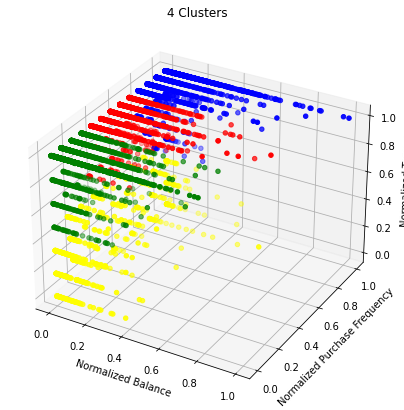

In [13]:
km = KMeans(
    n_clusters=4, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(df)
df=pd.concat([primarydf,pd.DataFrame(y_km)],axis=1)
df=df.rename(columns={0:'Cluster'})

# Creating figure

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(df.loc[df['Cluster']==0]['BALANCE'], df.loc[df['Cluster']==0]['PURCHASES_FREQUENCY'], df.loc[df['Cluster']==0]['TENURE'], color = 'green')
ax.scatter3D(df.loc[df['Cluster']==1]['BALANCE'], df.loc[df['Cluster']==1]['PURCHASES_FREQUENCY'], df.loc[df['Cluster']==1]['TENURE'], color = 'blue')
ax.scatter3D(df.loc[df['Cluster']==2]['BALANCE'], df.loc[df['Cluster']==2]['PURCHASES_FREQUENCY'], df.loc[df['Cluster']==2]['TENURE'], color = 'red')
ax.scatter3D(df.loc[df['Cluster']==3]['BALANCE'], df.loc[df['Cluster']==3]['PURCHASES_FREQUENCY'], df.loc[df['Cluster']==3]['TENURE'], color = 'yellow')
plt.title("4 Clusters")
plt.xlabel('Normalized Balance')
plt.ylabel('Normalized Purchase Frequency')
ax.set_zlabel('Normalized Tenure')
 
# show plot
plt.show()

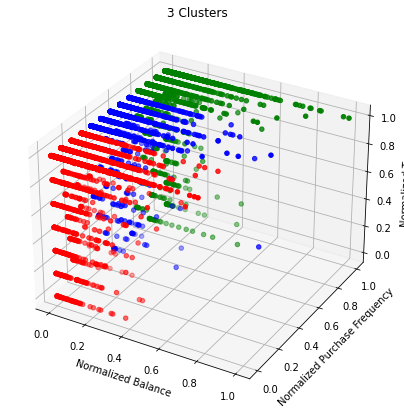

In [14]:
km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(primarydf)
df=pd.concat([primarydf,pd.DataFrame(y_km)],axis=1)
df=df.rename(columns={0:'Cluster'})

# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(df.loc[df['Cluster']==0]['BALANCE'], df.loc[df['Cluster']==0]['PURCHASES_FREQUENCY'], df.loc[df['Cluster']==0]['TENURE'], color = 'green')
ax.scatter3D(df.loc[df['Cluster']==1]['BALANCE'], df.loc[df['Cluster']==1]['PURCHASES_FREQUENCY'], df.loc[df['Cluster']==1]['TENURE'], color = 'blue')
ax.scatter3D(df.loc[df['Cluster']==2]['BALANCE'], df.loc[df['Cluster']==2]['PURCHASES_FREQUENCY'], df.loc[df['Cluster']==2]['TENURE'], color = 'red')
plt.xlabel('Normalized Balance')
plt.ylabel('Normalized Purchase Frequency')
ax.set_zlabel('Normalized Tenure')
plt.title('3 Clusters')
 
# show plot
plt.show()

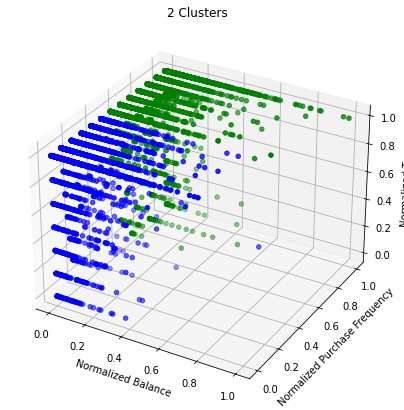

In [15]:
km = KMeans(
    n_clusters=2, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(primarydf)
df=pd.concat([primarydf,pd.DataFrame(y_km)],axis=1)
df=df.rename(columns={0:'Cluster'})

# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(df.loc[df['Cluster']==0]['BALANCE'], df.loc[df['Cluster']==0]['PURCHASES_FREQUENCY'], df.loc[df['Cluster']==0]['TENURE'], color = 'green')
ax.scatter3D(df.loc[df['Cluster']==1]['BALANCE'], df.loc[df['Cluster']==1]['PURCHASES_FREQUENCY'], df.loc[df['Cluster']==1]['TENURE'], color = 'blue')
plt.xlabel('Normalized Balance')
plt.ylabel('Normalized Purchase Frequency')
ax.set_zlabel('Normalized Tenure')
plt.title('2 Clusters')
 
# show plot
plt.show()

Now we will approach the same dataset via hierarchical clustering. In order to keep the runtime to a reasonable length, we will only cluster the first 30 customers in the dataset, but this time we will use every feature except Customer ID. For this method, we will get rid of any row that contains an NA value. Instead of this method, you could impute the missing values.

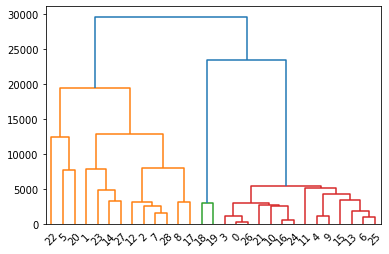

In [16]:
#making a dendrogram for the first thirty customers in the dataset, based on everything but customer ID
hierdata=data[[col for col in data.columns.to_list() if col!='CUST_ID']][0:30]
hierdata=hierdata.dropna(how='any')#get rid of any column that contains an NA value - could also impute missing data
linkage_data = linkage(hierdata, method='ward', metric='euclidean')
dendrogram(linkage_data)
plt.show()

# Real World Applications of Clustering:

CrimeStat is a software used to map crimes. Police departments use this software to make informed decisions about where to station officers and focus crime prevention efforts. An example hierarchical clustering of burglary hotspots in Baltimore County, based on 1996 data, is shown below. The different colors of clusters represent different cluster sizes.
<div>
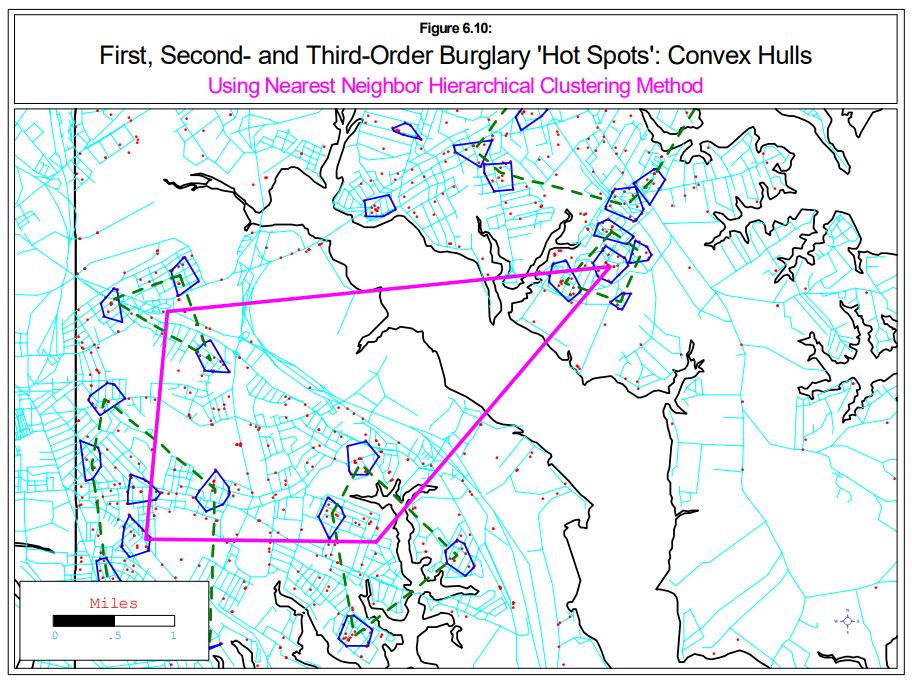
</div>

K-Means clustering and PCA can be used for change detection in sattelite images. The approach is described below.
<div>
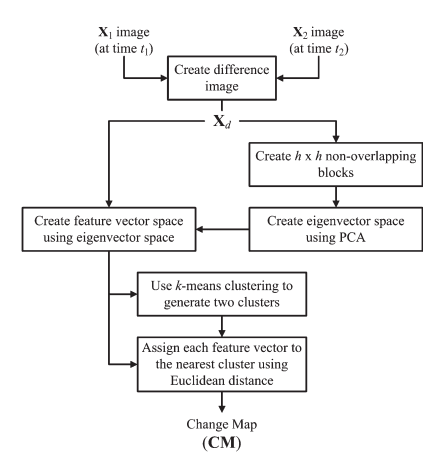
</div>

Many retailers use K-Means clustering for market segmentation. By clustering, they can identify groups of similar customers. A fictional example is shown below.
<!--via https://www.analyticsvidhya.com/blog/2021/05/k-means-clustering-with-mall-customer-segmentation-data-full-detailed-code-and-explanation/-->
<div>
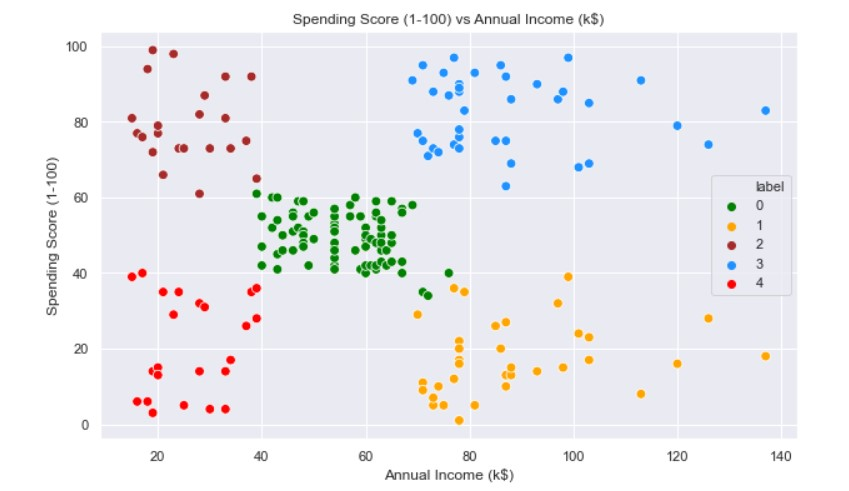
</div>

Clustering can be used in recommendation algorithms. To do this, users are divided into clusters based on their purchases or ratings. Then, the recommendation engine can suggest products that other users in the cluster rated highly. This gives a more holistic approach to recommendations than recommendations based on a singal purchase (e.g. "Other customers also bought..."). This process is represented below: 

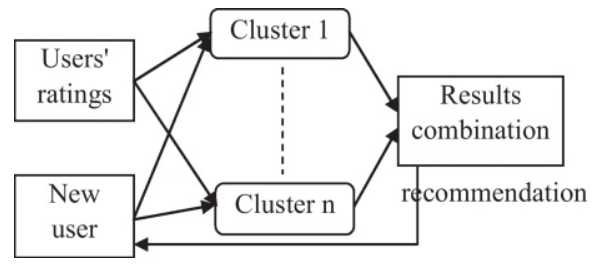

A more detailed explanation is available here: https://arxiv.org/ftp/arxiv/papers/2109/2109.12839.pdf

Sources:

https://en.wikipedia.org/wiki/CrimeStat

https://www.icpsr.umich.edu/CrimeStat/files/CrimeStatChapter.6.pdf

https://ieeexplore-ieee-org.pitt.idm.oclc.org/stamp/stamp.jsp?tp=&arnumber=5196726&tag=1

https://www.analyticsvidhya.com/blog/2021/05/k-means-clustering-with-mall-customer-segmentation-data-full-detailed-code-and-explanation/--

https://www.sciencedirect.com/science/article/abs/pii/S1568494611004583


# Principal Components Analysis

## Background reading:
*Intro to Statistical Learning*: Chapter 6, Principal Components Regression (Sections 6.3.1, Page 252-259)

*Intro to Statistical Learning*: Chapter 12, Principal Components Analysis (Sections 12.2, Page 498-510)

## Dataset:
The first two examples use the generated random data to mask PCA steps

The third example uses winequality of red
https://archive.ics.uci.edu/ml/datasets/wine+quality

1. fixed acidity
2. volatile acidity
3. citric acid
4. residual sugar
5. chlorides
6. free sulfur dioxide
7. total sulfur dioxide
8. density
9. pH
10. sulphates
11. alcohol
12. quality

## Essence of Data:

**What is PCA?**
Principal components analysis (PCA) is a popular approach for deriving a low-dimensional set of features from a large set of variables. While retaining the maximum amount of information, it improves the interpretability of data and realizes the visualization of multidimensional data.

**How does PCA work?**
Article: https://builtin.com/data-science/step-step-explanation-principal-component-analysis

1. Standardized (decentralized) initial data
2. Calculate covariance matrix of standardized data to identify correlation
3. Calculate eigenvectors and eigenvalues of covariance matrix to identify principal components
4. Create feature vectors to determine which principal components to retain
5. Recast data along the principal component axis

Derivation of PCA using the covariance method

Basic equation
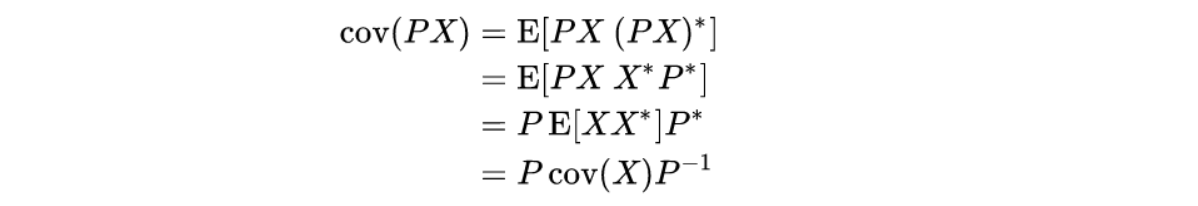

Image interpretation
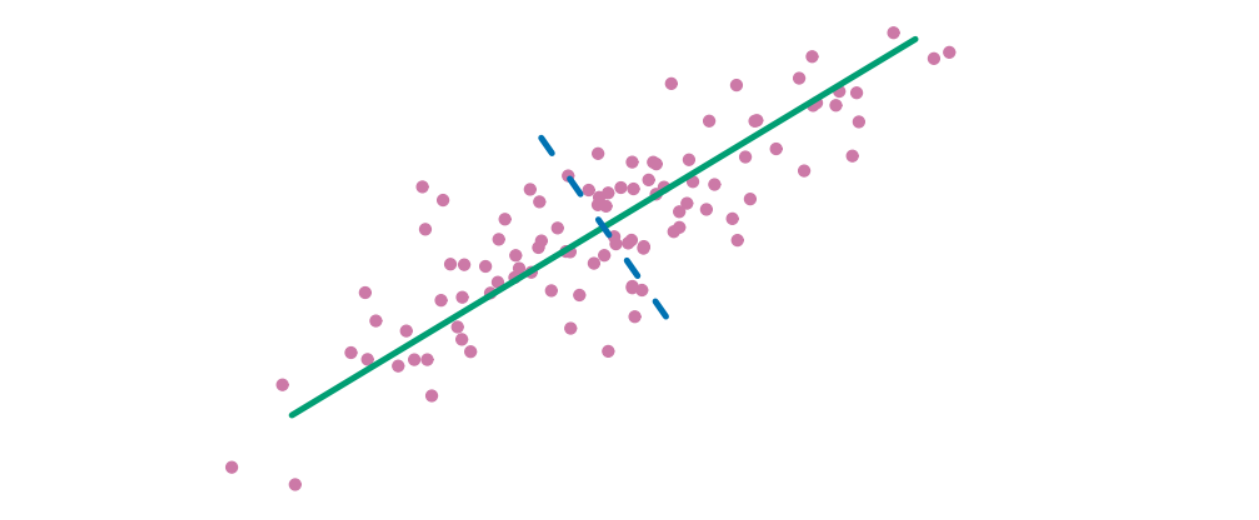


### Examples of application?
**Article:** 

https://towardsdatascience.com/principal-component-analysis-algorithm-in-real-life-discovering-patterns-in-a-real-estate-dataset-18134c57ffe7


Use PCA to study the reasons why some properties have not been sold for a long time.

https://pca4ds.github.io/application-examples.html

Some applications of PCA in various case studies.

### Example Code

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd
import math
import sklearn
from sklearn import metrics
import seaborn as sns

np.set_printoptions(precision= 4,suppress=True)

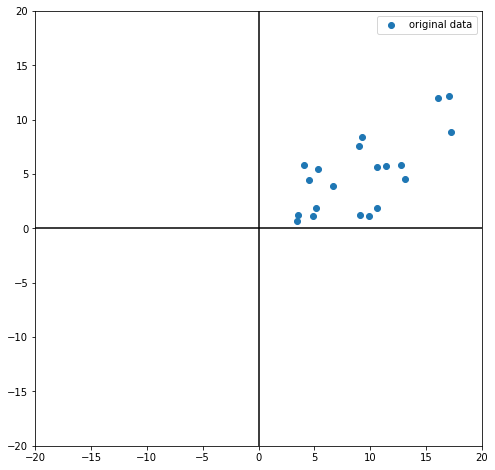

In [3]:
#Randomly generated data
np.random.seed(2)
data = np.random.uniform(1,20,(20,2))
data[:,1:] = 0.5*data[:,0:1]+np.random.uniform(-4,4,(20,1))

#Draw original data graph
size = 20
plt.figure(1,(8,8))
plt.scatter(data[:,0],data[:,1],label='original data')
plt.plot([-size,size],[0,0],c='black')
plt.plot([0,0],[-size,size],c='black')
plt.xlim(-size,size)
plt.ylim(-size,size)
plt.legend()
plt.show()

In [4]:
#Take the mean point of the original data as the origin
data_norm = data-data.mean(axis = 0)
data_norm

array([[ 0.088 ,  3.3809],
       [ 2.2477,  0.7444],
       [-0.2089,  2.6322],
       [-4.3075, -3.8004],
       [-2.5024, -1.0936],
       [ 3.6057,  0.8437],
       [-5.6389, -3.705 ],
       [-4.6915, -0.5128],
       [ 8.0297,  3.9202],
       [ 7.8888,  7.1948],
       [ 1.4038,  0.6761],
       [-0.0615, -3.7535],
       [-5.7798, -4.3387],
       [-3.9016,  0.4765],
       [-4.0101, -3.1343],
       [ 0.6921, -3.8158],
       [ 3.9719, -0.4162],
       [ 1.4036, -3.1405],
       [ 6.8832,  7.0129],
       [-5.1122,  0.829 ]])

In [5]:
#Calculate covariance matrix

C = np.cov(data_norm.T)
C

array([[20.0979, 10.9159],
       [10.9159, 12.3302]])

In [6]:
#Calculate eigenvalues and eigenvectors
vals, vecs = np.linalg.eig(C)

#Reorder, from large to small
vecs = vecs[:,np.argsort(-vals)]
vals = vals[np.argsort(-vals)]

In [7]:
#Eigenvector corresponding to the first eigenvalue
vals[0],vecs[:,0]

(27.80025909969357, array([0.8171, 0.5765]))

In [8]:
#Eigenvector corresponding to the second eigenvalue
vals[1],vecs[:,1]

(4.627791045140581, array([-0.5765,  0.8171]))

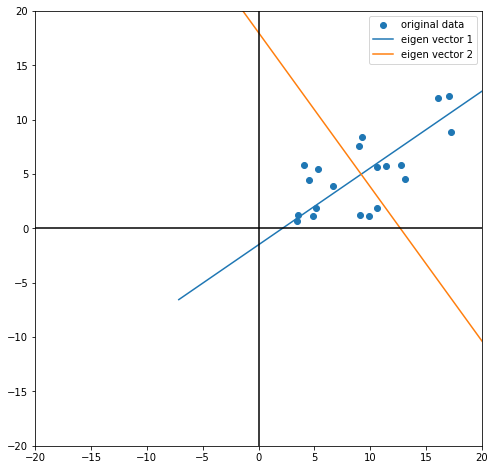

In [9]:
#Draw scatter chart
plt.figure(1,(8,8))
plt.scatter(data[:,0],data[:,1],label='original data')

#Draw the axis where the corresponding direction of the first eigenvector passes the mean point
i=0
ev = np.array([vecs[:,i]*-1,vecs[:,i]])*size
ev = (ev+data.mean(0))
plt.plot(ev[:,0],ev[:,1],label = 'eigen vector '+str(i+1))

#Draw the axis where the corresponding direction of the second eigenvector passes the mean point
i=1
ev = np.array([vecs[:,i]*-1,vecs[:,i]])*size
ev = (ev+data.mean(0))
plt.plot(ev[:,0],ev[:,1],label = 'eigen vector '+str(i+1))

#Draw x-axis y-axis
plt.plot([-size,size],[0,0],c='black')
plt.plot([0,0],[-size,size],c='black')
plt.xlim(-size,size)
plt.ylim(-size,size)
plt.legend()
plt.show()

In [10]:
#The projection coordinate of data on principal component one is Y
Q = vecs[:,:1]
Y = np.matmul(data_norm,Q)
Y

array([[ 2.0211],
       [ 2.2657],
       [ 1.3469],
       [-5.7106],
       [-2.6751],
       [ 3.4325],
       [-6.7434],
       [-4.1289],
       [ 8.8209],
       [10.5938],
       [ 1.5368],
       [-2.2143],
       [-7.2239],
       [-2.9132],
       [-5.0836],
       [-1.6345],
       [ 3.0054],
       [-0.6638],
       [ 9.6673],
       [-3.6991]])

In [11]:
#Add the mean value to restore the data
data_ = np.matmul(Y,Q.T)+data.mean(0)
data_

array([[10.8473,  6.1427],
       [11.0471,  6.2837],
       [10.2964,  5.754 ],
       [ 4.5299,  1.6851],
       [ 7.0101,  3.4351],
       [12.0005,  6.9564],
       [ 3.686 ,  1.0896],
       [ 5.8222,  2.597 ],
       [16.4032, 10.063 ],
       [17.8518, 11.0851],
       [10.4515,  5.8635],
       [ 7.3866,  3.7008],
       [ 3.2934,  0.8126],
       [ 6.8156,  3.2979],
       [ 5.0422,  2.0466],
       [ 7.8604,  4.0351],
       [11.6515,  6.7101],
       [ 8.6535,  4.5948],
       [17.0948, 10.551 ],
       [ 6.1735,  2.8448]])

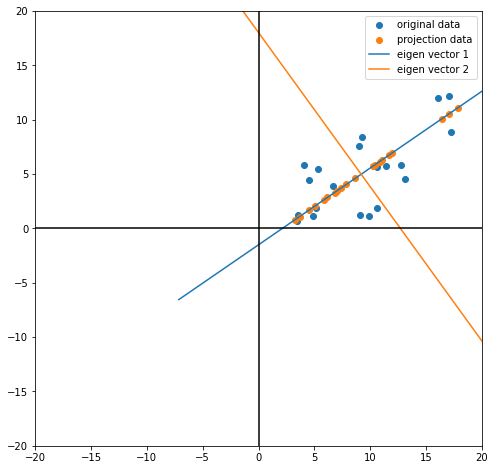

In [12]:
#Draw scatter chart
plt.figure(1,(8,8))
plt.scatter(data[:,0],data[:,1],label='original data')
plt.scatter(data_[:,0],data_[:,1],label='projection data')

#Draw the axis where the corresponding direction of the first eigenvector passes the mean point
i=0
ev = np.array([vecs[:,i]*-1,vecs[:,i]])*size
ev = (ev+data.mean(0))
plt.plot(ev[:,0],ev[:,1],label = 'eigen vector '+str(i+1))

#Draw the axis where the corresponding direction of the second eigenvector passes the mean point
i=1
ev = np.array([vecs[:,i]*-1,vecs[:,i]])*size
ev = (ev+data.mean(0))
plt.plot(ev[:,0],ev[:,1],label = 'eigen vector '+str(i+1))

#Draw x-axis y-axis
plt.plot([-size,size],[0,0],c='black')
plt.plot([0,0],[-size,size],c='black')
plt.xlim(-size,size)
plt.ylim(-size,size)
plt.legend()
plt.show()

In [13]:
#Perform PCA on 3D data
import matplotlib.pyplot as mpld3
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

In [14]:
#Randomly generate 3D data
np.random.seed(0)
data = np.random.uniform(-10,10,(20,3))
data[:,1:] = 0.5*data[:,0:1]+np.random.uniform(-2,2,(20,1))
data[:,2:] = 0.5*data[:,0:1]+np.random.uniform(-3,3,(20,1))
data

array([[ 0.9763, -0.876 , -0.604 ],
       [ 0.8977, -1.1097, -0.0656],
       [-1.2483,  0.0012, -3.2392],
       [-2.3312, -2.6129, -0.0108],
       [ 1.3609, -0.5332,  1.0801],
       [-8.2574, -4.6538, -5.5364],
       [ 5.5631,  4.0655,  2.9211],
       [ 5.9832,  1.38  ,  0.5552],
       [-7.6345, -2.4655, -3.3616],
       [ 8.8934,  2.8311,  7.0225],
       [-4.7089, -0.4486, -3.443 ],
       [ 1.3687,  0.5589,  1.6888],
       [ 2.2419,  3.028 , -1.0883],
       [ 3.6364,  2.2376,  3.1162],
       [ 3.9526,  2.9334,  0.7127],
       [ 3.4128, -0.1369, -0.1945],
       [-3.6914, -2.7145, -1.3266],
       [-1.228 , -2.1332, -3.4933],
       [-5.8225, -3.7267, -0.9376],
       [-4.9342, -3.9922, -5.4389]])

In [15]:
#Take the mean point as the origin
data_normal = data-data.mean(0)
data_normal 

array([[ 1.0547, -0.4576, -0.0218],
       [ 0.9761, -0.6913,  0.5166],
       [-1.1698,  0.4196, -2.6571],
       [-2.2527, -2.1945,  0.5714],
       [ 1.4394, -0.1149,  1.6622],
       [-8.1789, -4.2354, -4.9542],
       [ 5.6416,  4.4839,  3.5032],
       [ 6.0616,  1.7984,  1.1374],
       [-7.556 , -2.0471, -2.7794],
       [ 8.9718,  3.2494,  7.6046],
       [-4.6304, -0.0302, -2.8609],
       [ 1.4471,  0.9773,  2.271 ],
       [ 2.3204,  3.4464, -0.5061],
       [ 3.7149,  2.656 ,  3.6983],
       [ 4.0311,  3.3517,  1.2949],
       [ 3.4912,  0.2815,  0.3877],
       [-3.613 , -2.2961, -0.7445],
       [-1.1495, -1.7148, -2.9112],
       [-5.744 , -3.3083, -0.3554],
       [-4.8557, -3.5738, -4.8568]])

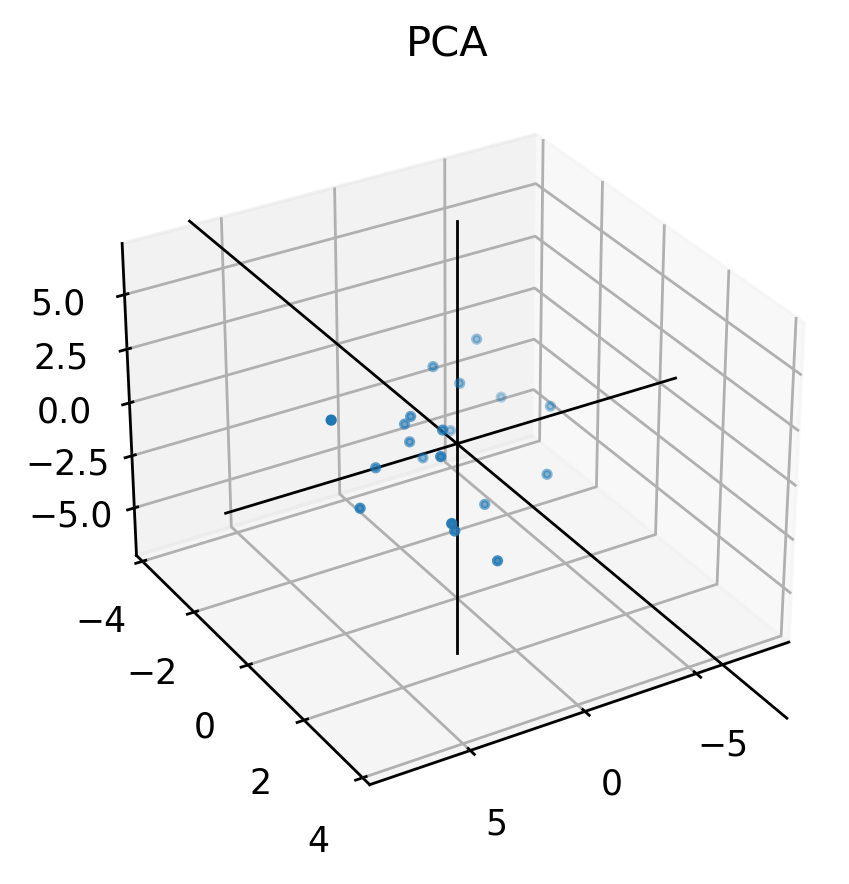

In [16]:
#Separating data
X = data[:,0]
Y = data[:,1]
Z = data[:,2]

for i in range(45,60):
    #Animation
    import IPython
    IPython.display.clear_output(wait=True)
    fig = plt.figure(1,(6,4),dpi = 250)
    ax = fig.gca(projection='3d')
    plt.cla()
    
    #Draw Scatter
    ax.scatter(X,Y,Z,s=5)

    #Draw xyz axis
    ax.plot([0,0],[0,0],[-10,10],c = 'black',linewidth = 0.8)
    ax.plot([0,0],[-10,10],[0,0],c = 'black',linewidth = 0.8)
    ax.plot([-10,10],[0,0],[0,0],c = 'black',linewidth = 0.8)
    
    #Drawing range
    ax.view_init(azim=i)
    plt.xlim(-X.max(), X.max())
    plt.ylim(-Y.max(), Y.max())
    ax.set_zlim(-Z.max(),Z.max())
    plt.title('PCA')
    plt.show()

In [17]:
#Calculate covariance matrix
C = np.cov(data_normal.T)

#Calculate eigenvalues and eigenvectors
vals, vecs = np.linalg.eig(C)

#Reorder, from large to small
vecs = vecs[:,np.argsort(-vals)]
vals = vals[np.argsort(-vals)]
vals,vecs

(array([34.5686,  2.4069,  1.2623]),
 array([[-0.7952, -0.2741, -0.5409],
        [-0.3904, -0.4512,  0.8025],
        [-0.464 ,  0.8493,  0.2518]]))

In [18]:
#Make projection data
zcf = np.matmul(data_normal,vecs[:,:2])
data_ = np.matmul(zcf,vecs[:,:2].T)+data.mean(0)
data_

array([[ 0.466 , -0.119 , -0.3664],
       [ 0.3823, -0.3452,  0.1743],
       [-1.0858, -0.2398, -3.3149],
       [-2.5468, -2.293 ,  0.0896],
       [ 1.1163, -0.1704,  1.1939],
       [-8.3776, -4.4755, -5.4804],
       [ 6.336 ,  2.919 ,  2.5613],
       [ 5.1451,  2.6233,  0.9454],
       [-6.6908, -3.8655, -3.8009],
       [ 8.7146,  3.0963,  7.1057],
       [-3.7568, -1.861 , -3.8863],
       [ 1.6788,  0.0988,  1.5444],
       [ 2.99  ,  1.9181, -1.4365],
       [ 4.2061,  1.3924,  2.8509],
       [ 4.4044,  2.2631,  0.5024],
       [ 2.5662,  1.119 ,  0.1996],
       [-3.7324, -2.6537, -1.3076],
       [-2.0326, -0.9396, -3.1188],
       [-5.6263, -4.0178, -1.0289],
       [-5.7263, -2.817 , -5.0701]])

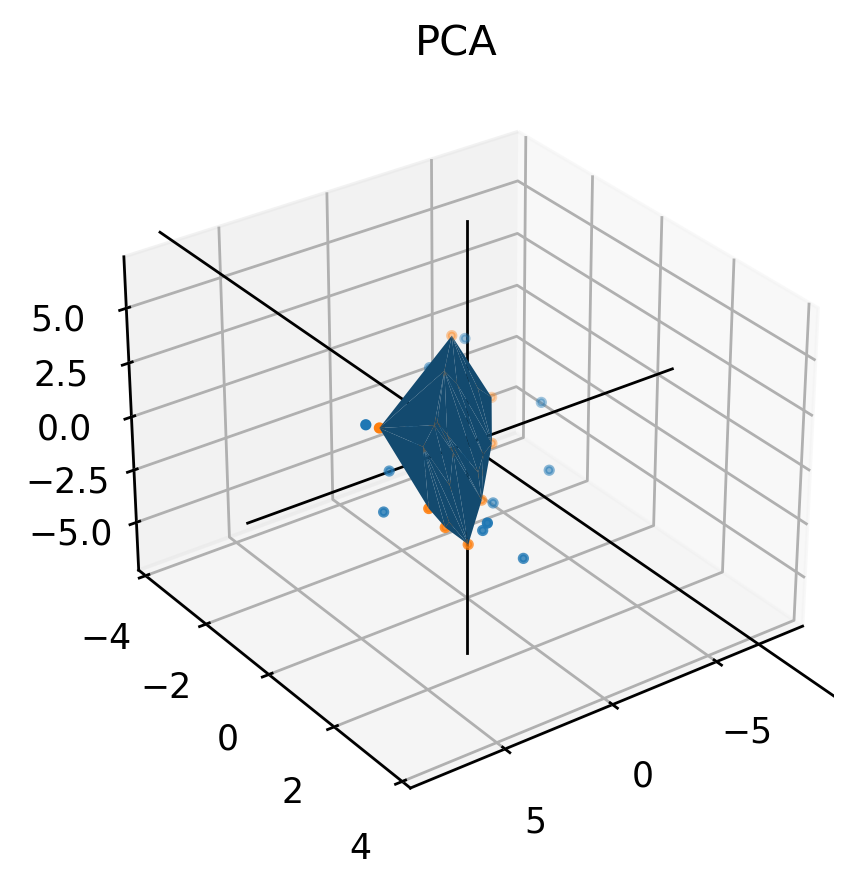

In [19]:
#Separating data
X = data[:,0]
Y = data[:,1]
Z = data[:,2]
X_ = data_[:,0]
Y_ = data_[:,1]
Z_ = data_[:,2]

for i in range(35,55):
    #Animation
    import IPython
    IPython.display.clear_output(wait=True)
    fig = plt.figure(1,(6,4),dpi = 250)
    ax = fig.gca(projection='3d')
    plt.cla()
    
    #Draw Scatter
    ax.scatter(X,Y,Z,s=5,label='origin data') 
    ax.scatter(X_,Y_,Z_,s=5,label='restructured data')
    
    #Draw 3D plane
    ax.plot_trisurf(X_, Y_, Z_)
    
    #Draw xyz axis
    ax.plot([0,0],[0,0],[-10,10],c = 'black',linewidth = 0.8)
    ax.plot([0,0],[-10,10],[0,0],c = 'black',linewidth = 0.8)
    ax.plot([-10,10],[0,0],[0,0],c = 'black',linewidth = 0.8)
    
    #Drawing range
    ax.view_init(azim=i)
    plt.xlim(-X.max(), X.max())
    plt.ylim(-Y.max(), Y.max())
    ax.set_zlim(-Z.max(),Z.max())
    plt.title('PCA')
    plt.show()

In [20]:
#Import red wine quality data
df=pd.read_csv("C:/Users/86156/Desktop/winequality/winequality-red.csv")
df.head()

#Delete Duplicates
df.drop_duplicates(inplace=True)

<AxesSubplot:>

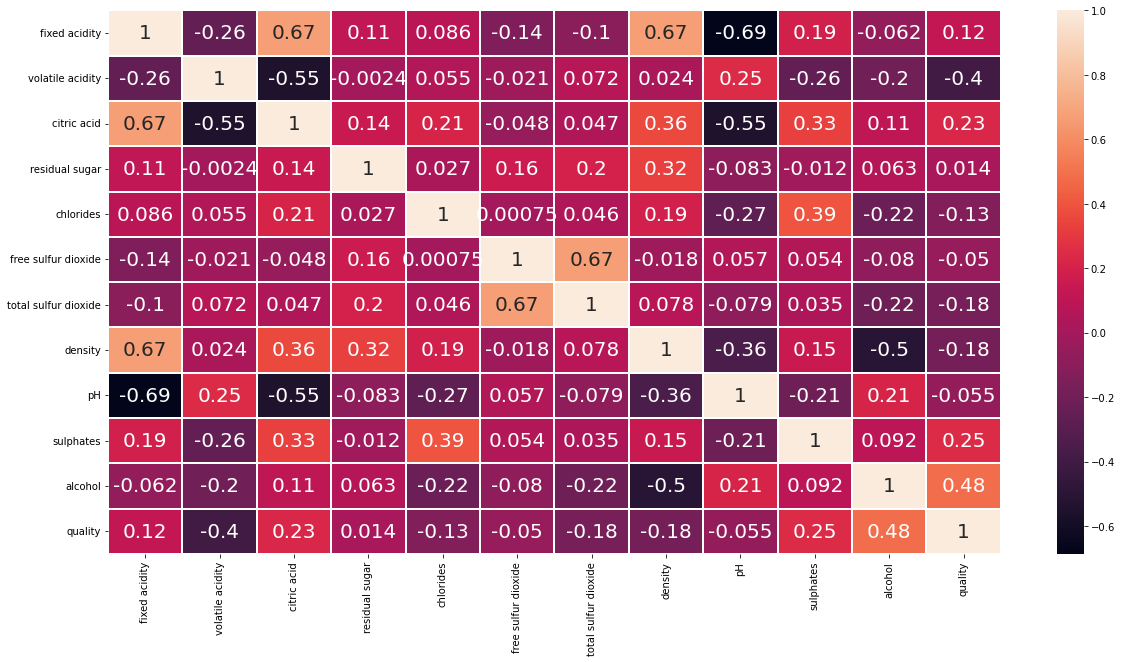

In [21]:
#Correlation coefficient
fig = plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True,linewidths=2,cbar=True,annot_kws={"size":20})

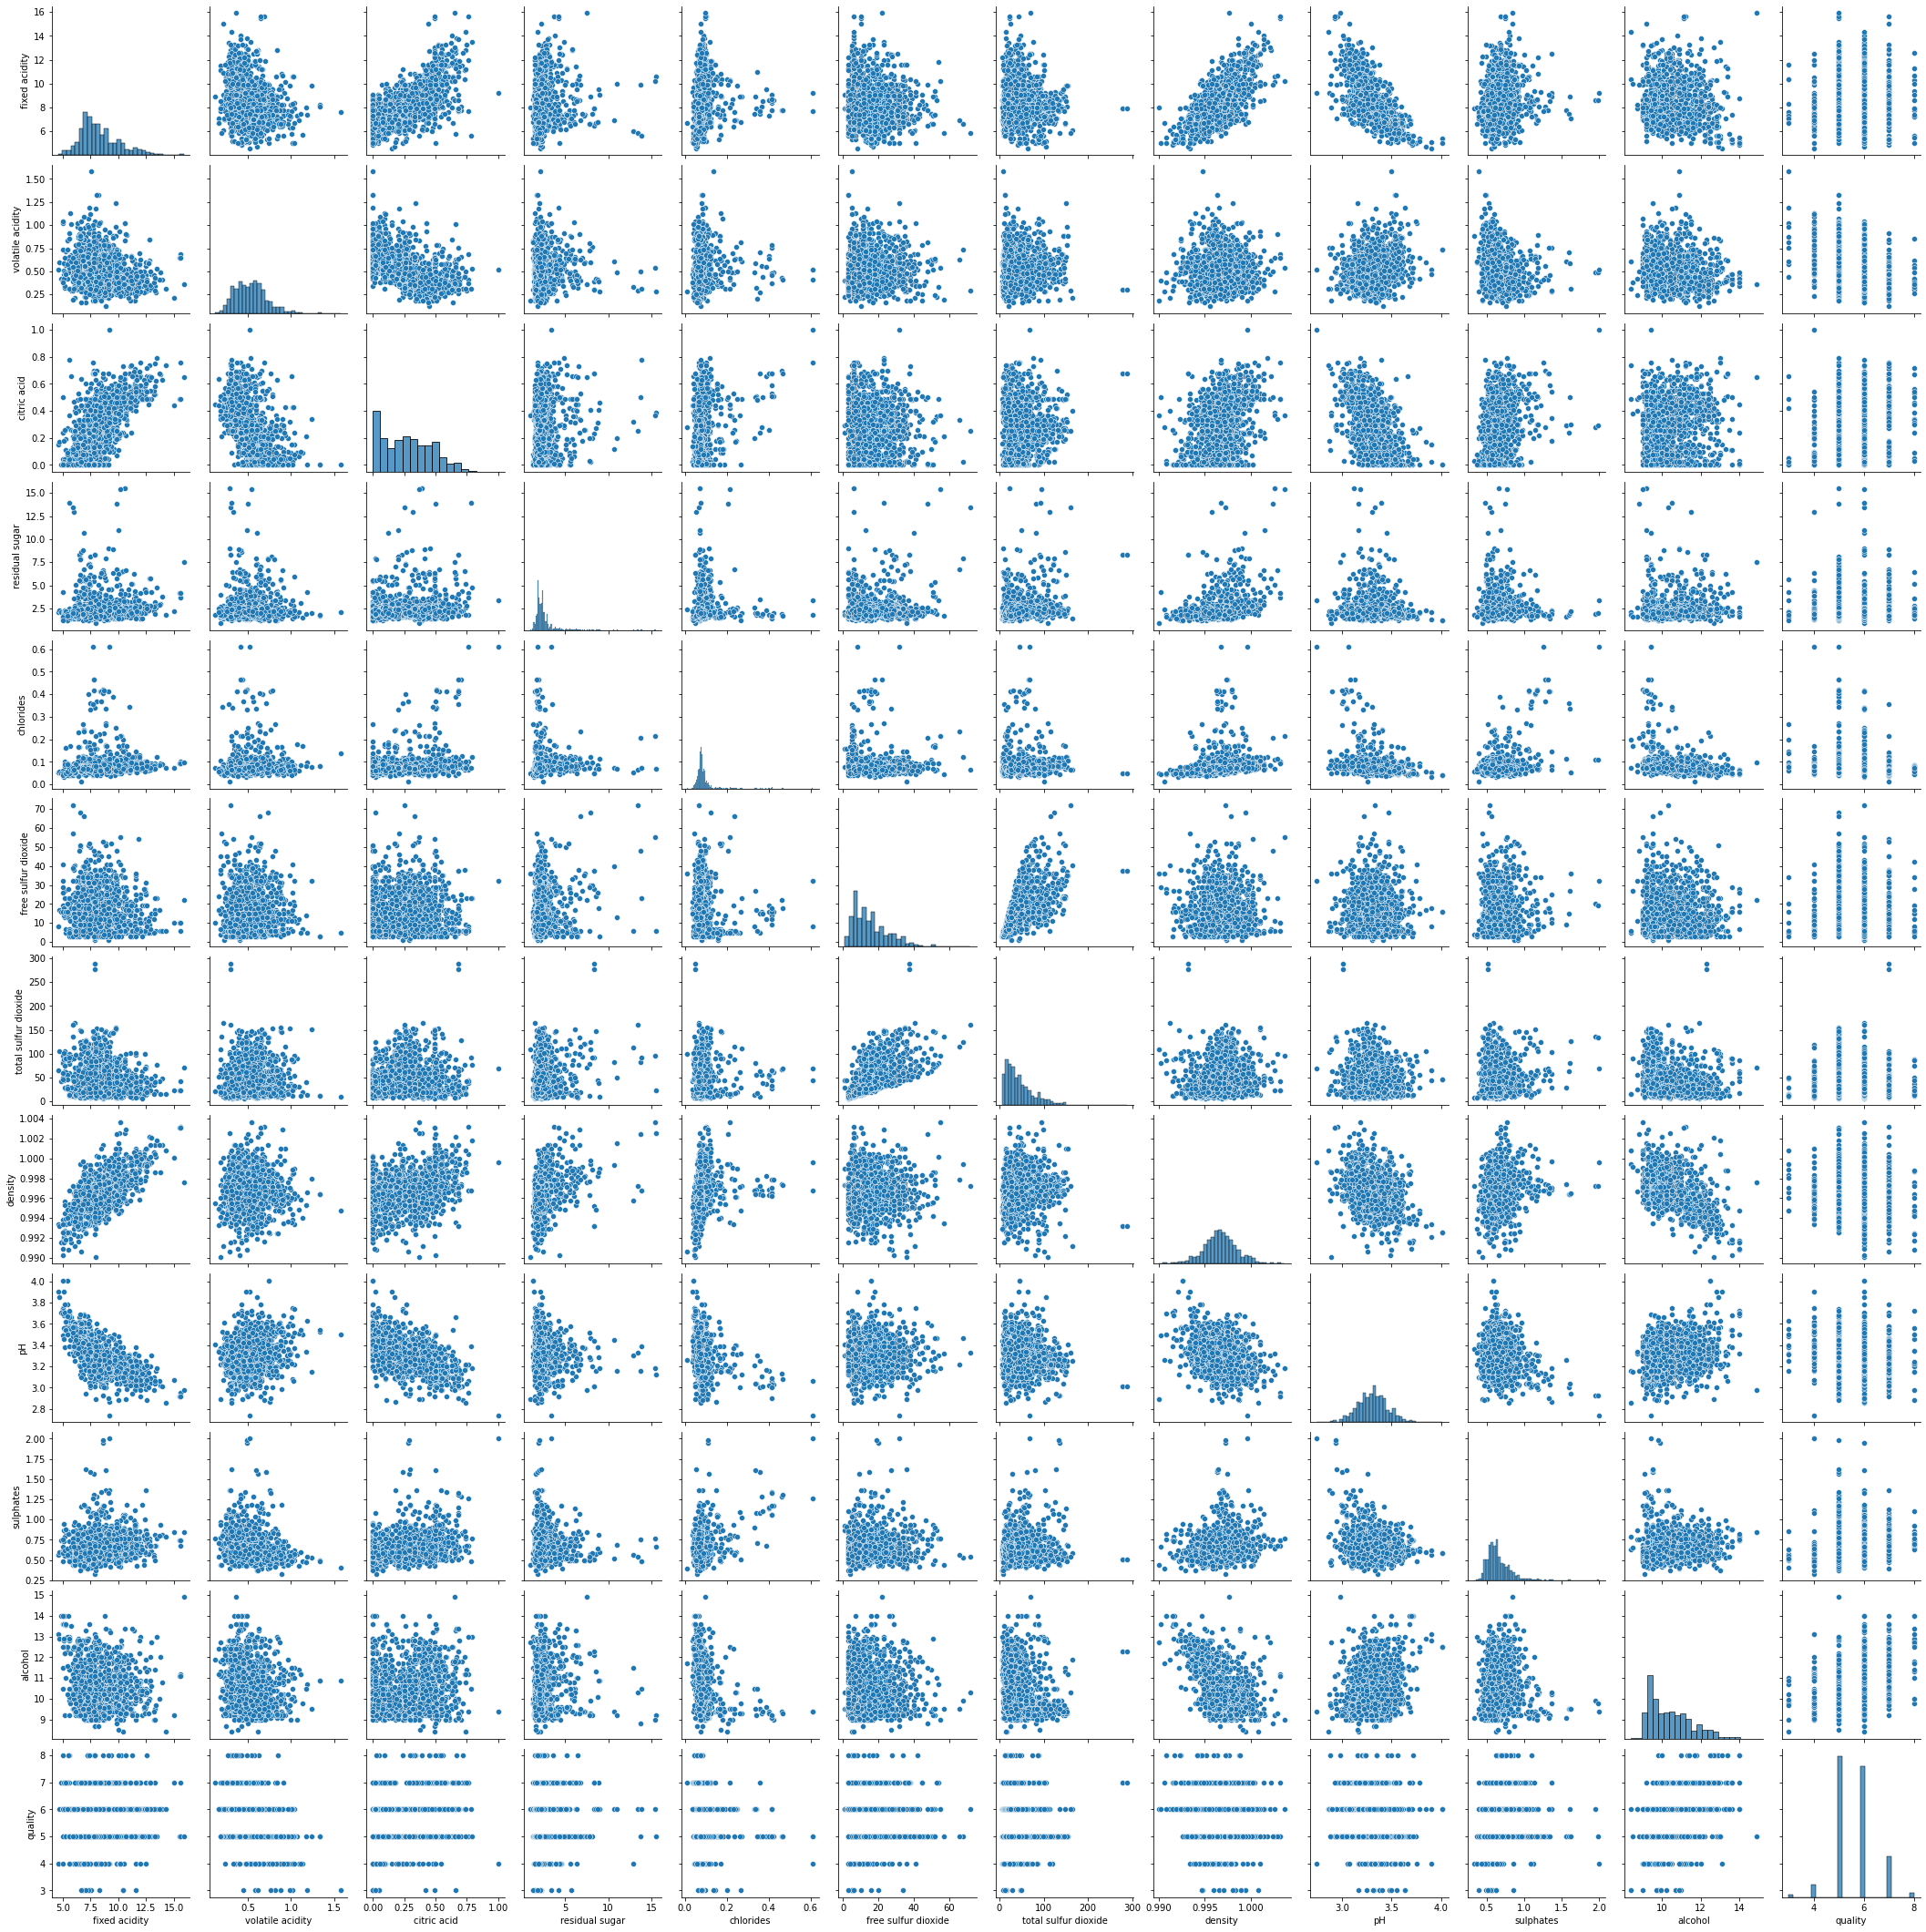

In [22]:
#Used to show the relationship between two characteristics
sns.pairplot(df)

In [23]:
#Log the data
df["Log_fixed acidity"]=np.log(df["fixed acidity"])
df["Log_volatile acidity"]=np.log(df["volatile acidity"])
df["Log_residual sugar"]=np.log(df["residual sugar"])
df["Log_chlorides"]=np.log(df["chlorides"])
df["Log_free sulfur dioxide"]=np.log(df["free sulfur dioxide"])
df["Log_total sulfur dioxide"]=np.log(df["total sulfur dioxide"])
df["Log_sulphates"]=np.log(df["sulphates"])
df["Log_alcohol"]=np.log(df["alcohol"])

#Drop previous columns
df.drop(columns = ['fixed acidity', 'volatile acidity','residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide','sulphates', 'alcohol'],axis=True,inplace =True)

#Rearrange columns
df = df[['Log_fixed acidity','Log_volatile acidity','citric acid', 'Log_residual sugar', 'Log_chlorides',
       'Log_free sulfur dioxide', 'Log_total sulfur dioxide','density',
       'pH','Log_sulphates','Log_alcohol','quality']]

df.head()

Log_fixed acidity  Log_volatile acidity  citric acid  Log_residual sugar  \
0           2.001480             -0.356675         0.00            0.641854   
1           2.054124             -0.127833         0.00            0.955511   
2           2.054124             -0.274437         0.04            0.832909   
3           2.415914             -1.272966         0.56            0.641854   
5           2.001480             -0.415515         0.00            0.587787   

   Log_chlorides  Log_free sulfur dioxide  Log_total sulfur dioxide  density  \
0      -2.577022                 2.397895                  3.526361   0.9978   
1      -2.322788                 3.218876                  4.204693   0.9968   
2      -2.385967                 2.708050                  3.988984   0.9970   
3      -2.590267                 2.833213                  4.094345   0.9980   
5      -2.590267                 2.564949                  3.688879   0.9978   

     pH  Log_sulphates  Log_alcohol  quality  
0  3.51      -0.579818     2.240710        5  
1  3.20      -0.385662     2.282382        5  
2  3.26      -0.430783     2.282382        5  
3  3.16      -0.544727     2.282382        6  
5  3.51      -0.579818     2.240710        5

In [24]:
#Dependent variable
x = df.drop('quality',axis=1)

#Target variable
Y = df['quality']

#Create training and test sets
x_train, x_test, Y_train, Y_test = train_test_split(x,Y,test_size = 0.25,random_state=44)

In [25]:
from sklearn.decomposition import PCA
#Number of components to keep. if n_components is not set all components are kept
pca = PCA(n_components = None)
x_train_graph = pca.fit_transform(x_train)
x_test_graph = pca.transform(x_test)

#Explained variance is a statistical measure of how much variation in a dataset 
#can be attributed to each of the principal components generated by the PCA.
explained_variance = pca.explained_variance_ratio_

print(sorted(explained_variance,reverse = True))

[0.5856836011917458, 0.10863226242279654, 0.098493140648631, 0.07646972877375757, 0.0604286020965848, 0.028857404125921, 0.02500359792368576, 0.00760575719679468, 0.00480782360991232, 0.004017773887162338, 3.081230082314934e-07]


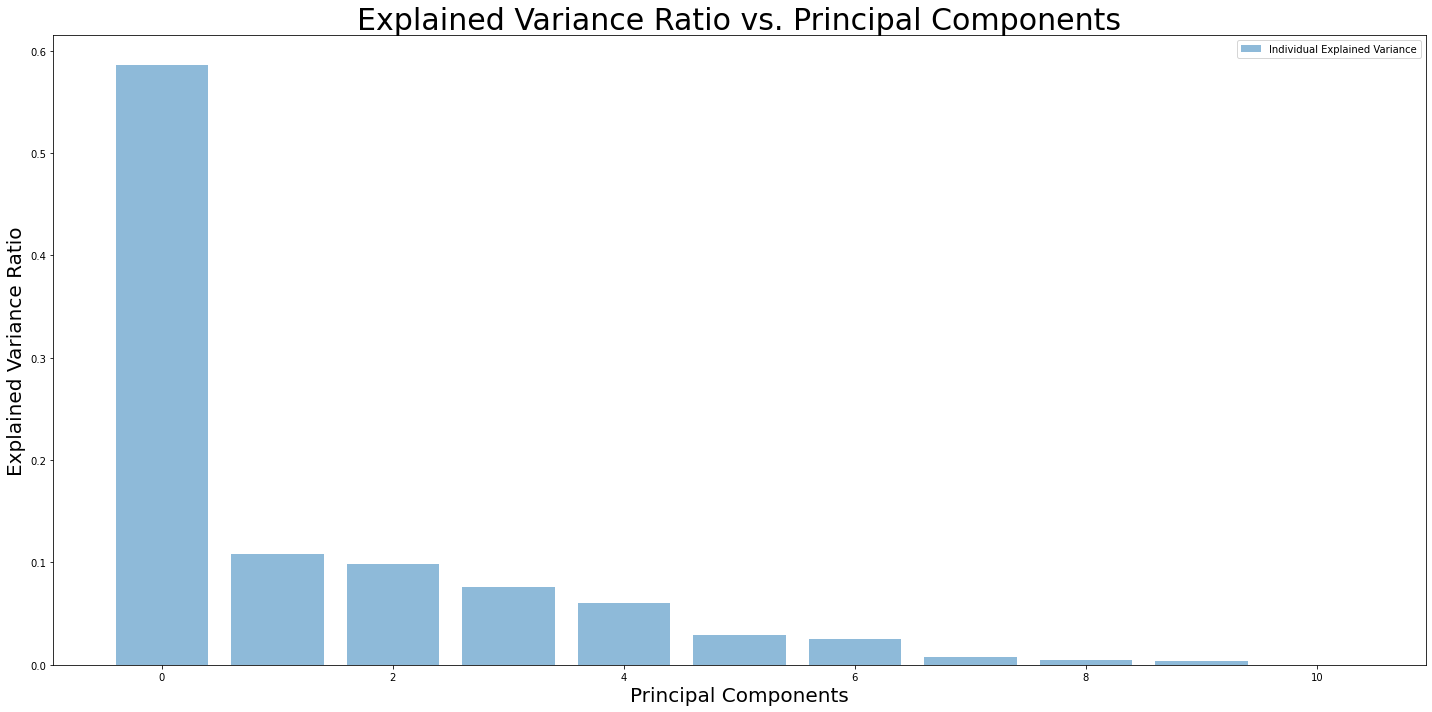

In [26]:
#Show variance and components of each dimension
fig = plt.figure(figsize=(20,10))
plt.bar(range(11), explained_variance, alpha=0.5, align='center',label='Individual Explained Variance')
plt.ylabel('Explained Variance Ratio',fontsize = 20)
plt.xlabel('Principal Components',fontsize = 20)
plt.title('Explained Variance Ratio vs. Principal Components',fontsize = 30)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [27]:
#According to the above figure, it is reasonable for us to reduce to 5 dimension
from sklearn.decomposition import PCA
pca = PCA(n_components = 5)
x_train_PCA = pca.fit_transform(x_train)
x_test_PCA = pca.transform(x_test)
explained_variance = pca.explained_variance_ratio_

print(explained_variance)

[0.5857 0.1086 0.0985 0.0765 0.0604]


In [28]:
#Start linear regression model for 5 PCA variables
linreg = LinearRegression()

#Match it with the training data, and generate a linear model with train set
linreg.fit(x_train_PCA,Y_train)

#Put x_test_PCA input linear model, and get Y_pred_PCA comes with Y_test for comparison
Y_pred_PCA = linreg.predict(x_test_PCA)

In [29]:
#Start linear regression model for origin 10 variables
linreg = LinearRegression()

#Match it with the training data, and generate a linear model with train set
linreg.fit(x_train,Y_train)

#Put x_test input linear model, and get Y_pred comes with Y_test for comparison
Y_pred = linreg.predict(x_test)

In [30]:
np.unique(Y_train)

array([3, 4, 5, 6, 7, 8], dtype=int64)

In [31]:
np.unique(Y_test)

array([3, 4, 5, 6, 7, 8], dtype=int64)

In [32]:
#Grading the quality of red wine to check the classification accuracy
Y_pred_cls = []
for i in Y_pred:
    if i >= 3 and i <= 4:
        Y_pred_cls.append('1')
    elif i > 4 and i <= 6:
        Y_pred_cls.append('2')
    elif i > 6 and i <= 8:
        Y_pred_cls.append('3')

In [33]:
#Grading the quality of red wine to check the classification accuracy
Y_pred_PCA_cls = []
for i in Y_pred_PCA:
    if i >= 3 and i <= 4:
        Y_pred_PCA_cls.append('1')
    elif i > 4 and i <= 6:
        Y_pred_PCA_cls.append('2')
    elif i > 6 and i <= 8:
        Y_pred_PCA_cls.append('3')

In [34]:
#Grading the quality of red wine to check the classification accuracy
Y_test_cls = []
for i in Y_test:
    if i >= 3 and i <= 4:
        Y_test_cls.append('1')
    elif i > 4 and i <= 6:
        Y_test_cls.append('2')
    elif i > 6 and i <= 8:
        Y_test_cls.append('3')

In [35]:
#Show confusion matrix and accurate score for origin 10 variables.
from sklearn.metrics import confusion_matrix, accuracy_score

LinearRegression_conf_matrix = confusion_matrix(Y_test_cls, Y_pred_cls)
LinearRegression_acc_score = accuracy_score(Y_test_cls, Y_pred_cls)

print(LinearRegression_conf_matrix)
print("accuracy:",LinearRegression_acc_score*100)

[[  0  14   0]
 [  0 225  54]
 [  0   8  39]]
accuracy: 77.64705882352942


In [36]:
#Show confusion matrix and accurate score for PCA variables.
from sklearn.metrics import confusion_matrix, accuracy_score

LinearRegression_conf_matrix = confusion_matrix(Y_test_cls, Y_pred_PCA_cls)
LinearRegression_acc_score = accuracy_score(Y_test_cls, Y_pred_PCA_cls)

print(LinearRegression_conf_matrix)
print("accuracy:",LinearRegression_acc_score*100)

[[  0  14   0]
 [  0 234  45]
 [  0  17  30]]
accuracy: 77.64705882352942


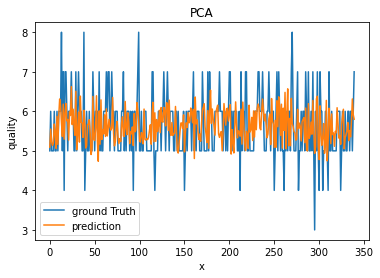

In [37]:
#Compare the coincidence between the real value and the PCA predicted value
xx=range(len(Y_test))
plt.plot(xx,Y_test,label="ground Truth")
plt.plot(xx,Y_pred_PCA,label="prediction")

plt.xlabel("x")
plt.ylabel("quality")
plt.title("PCA")
plt.legend()

plt.show()

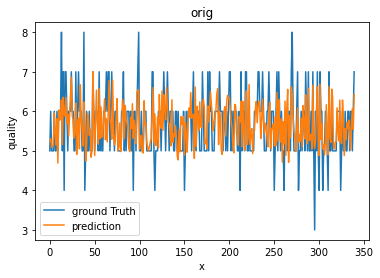

In [38]:
#Compare the coincidence between the real value and the 10 variables predicted value
xx=range(len(Y_test))
plt.plot(xx,Y_test,label="ground Truth")
plt.plot(xx,Y_pred,label="prediction")

plt.xlabel("x")
plt.ylabel("quality")
plt.title("orig")
plt.legend()

plt.show()

## PCA and Privacy

From the previous understanding, we know that one of the disadvantages of PCA is the low interpretability of the Principal components. Principal components are linear combinations of features in the original data, but they are not easy to interpret. For example, after calculating the Principal components, it is difficult to distinguish which are the most important features in the dataset.

This makes us inadvertently think, can low interpretability be used to transform sensitive data? By reducing dimensions, we can operate on the transformed data without knowing the original sensitive privacy data.

Using PCA to preserve privacy
https://blogs.ed.ac.uk/datasciencecdt/2020/03/31/using-pca-to-preserve-privacy/

# Brief History of Artificial Intelligence

## The Birth Of AI

### Isaac Asimov's "Three Laws of Robotics"

    A robot may not injure a human being or, through inaction, allow a human being to come to harm.

    A robot must obey orders given it by human beings except where such orders would conflict with the First Law.

    A robot must protect its own existence as long as such protection does not conflict with the First or Second Law. 
 
The three laws appeared in the Runaround published by American science fiction writer Asimov in 1942.

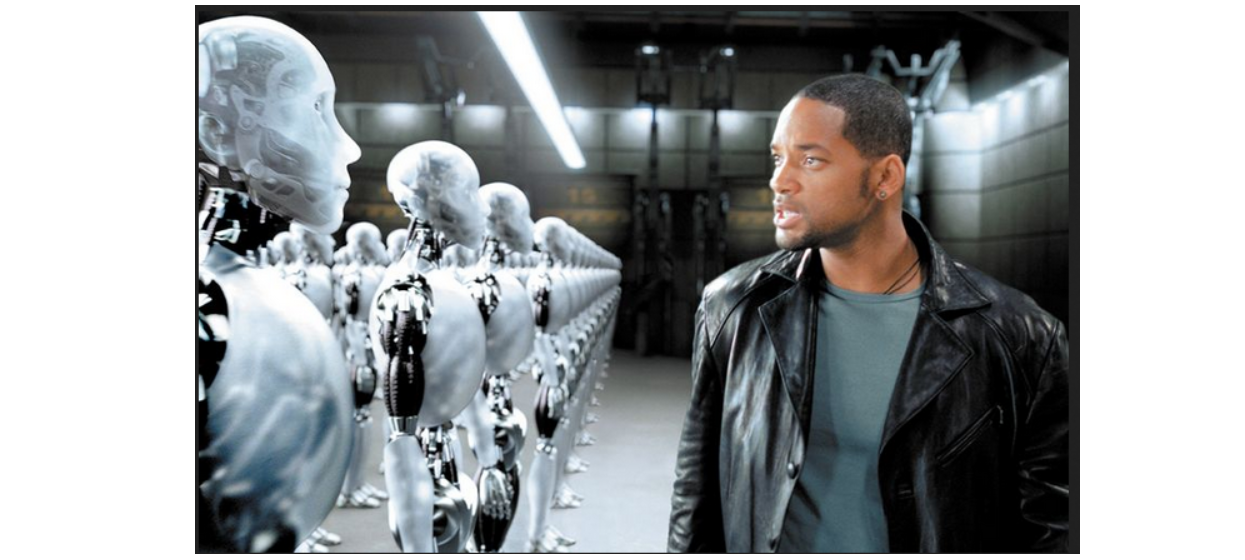
 
### The Bombe

The bombe was an electro-mechanical device used by British cryptologists to help decipher German Enigma-machine-encrypted secret messages during World War II.

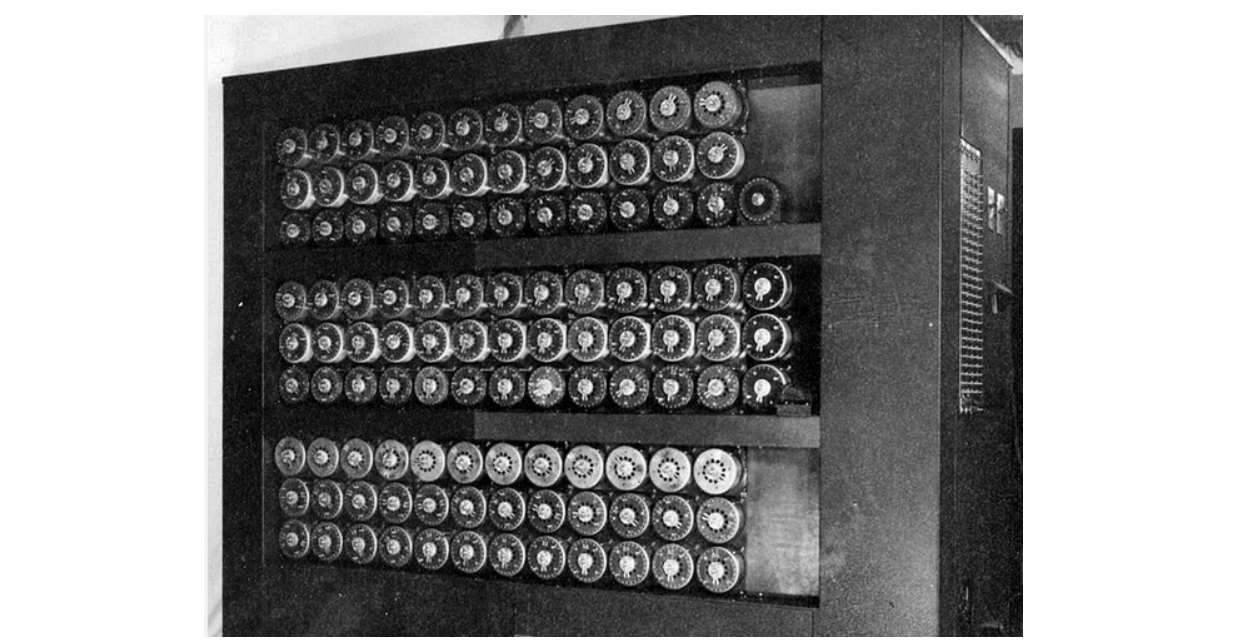

It is usually considered as the first electromechanical computer that can work. What the best mathematicians could not do before was done by this heavy machine.

In 1950, Turing published his groundbreaking article "Computing Machinery and Intelligence", which described how to create intelligent machines, especially how to test their intelligence. This is the famous Turing test - if a person interacts with another person and a machine, and cannot distinguish between machines and people, the machine is called intelligent.

Computing Machinery and Intelligence
https://academic.oup.com/mind/article/LIX/236/433/986238?login=false

### Dartmouth Workshop
The Dartmouth Summer Research Project on Artificial Intelligence(DSRPAI) was a 1956 summer workshop widely considered to be the founding event of artificial intelligence as a field.

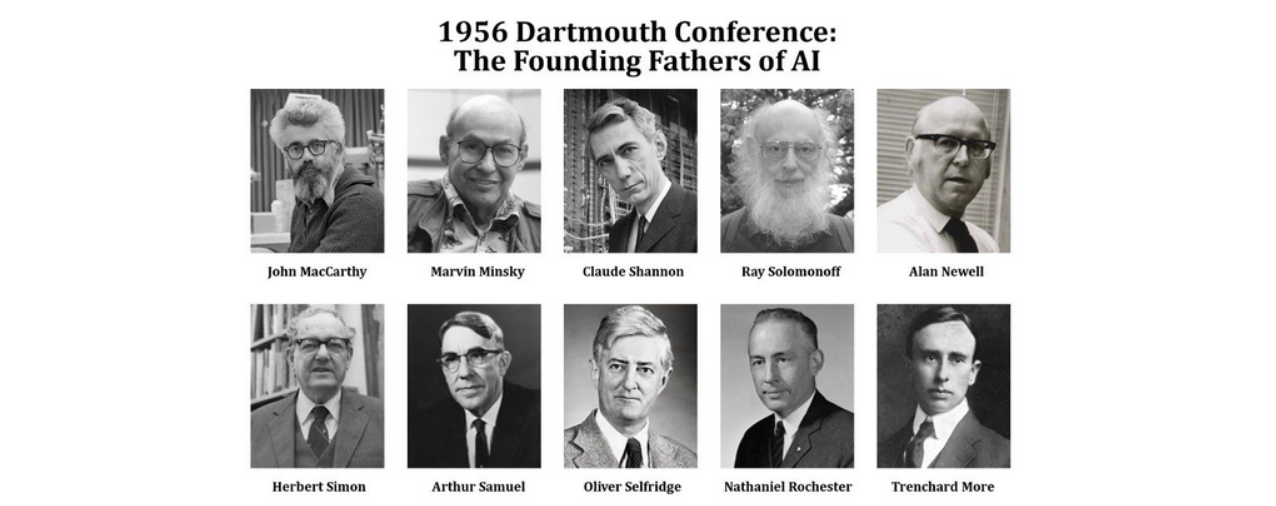

Nathaniel Rochester, who later designed the IBM 701

Claude Shannon, who founded information theory

## The Ups and Downs of Early AI

In the past 20 years since the Dartmouth Conference, great success has been achieved in the field of artificial intelligence.

### ELIZA
ELIZA is a natural language processing tool that can simulate dialogue with human beings, and it is also one of the first programs to try to pass the Turing test.

Eliza simulated conversation by using a "pattern matching" and substitution methodology that gave users an illusion of understanding on the part of the program

### Predicament of Early AI
In 1973, the US Congress began to strongly criticize the high investment in AI research. In the same year, some mathematicians questioned the optimistic prospects of AI researchers. A large number of countries have stopped supporting AI research in universities.

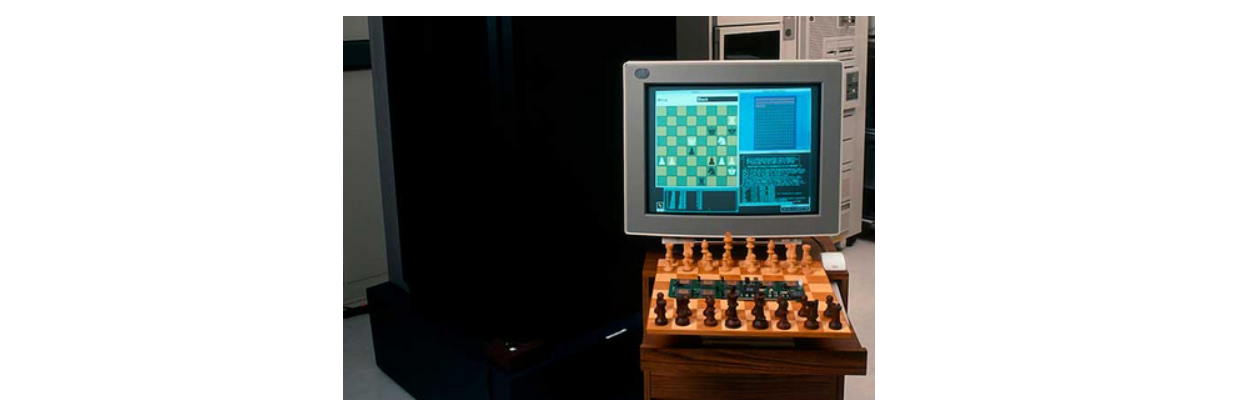

Early AI systems attempted to replicate specific ways of human intelligence. They are expert systems and rule sets. They simulate human experts dealing with complex problems in a certain field. But these systems cannot even recognize the simple functions of any object or human being. For such tasks, the system must be able to correctly interpret external data and learn from these data, so the expert system is not real AI.

## Today's AI

Today, artificial neural networks and deep learning form the basis of most applications under AI tags as we know them. It is currently used in many sectors, including but not limited to transportation, manufacturing, finance, health care, education and urban planning.

Video software can analyze our viewing preferences according to our viewing history and operating behavior. Shopping software can issue targeted advertisements and recommendations.

In the field of mobile mapping, various mapping software can analyze the traffic movement speed at any given time and timely combine with the on-site report of traffic incidents.

AI can also help financial institutions detect fraud, help with payment processing, mobile cheque deposit, insurance and investment selection recommendation.

AI devices and intelligent connectivity systems can also enhance the provision and management of health care. Telediagnosis and telemedicine are no longer new.

AI is also widely used in text processing scoring and inspection. Whether it is text material processing or the workload of educators, AI has its place.

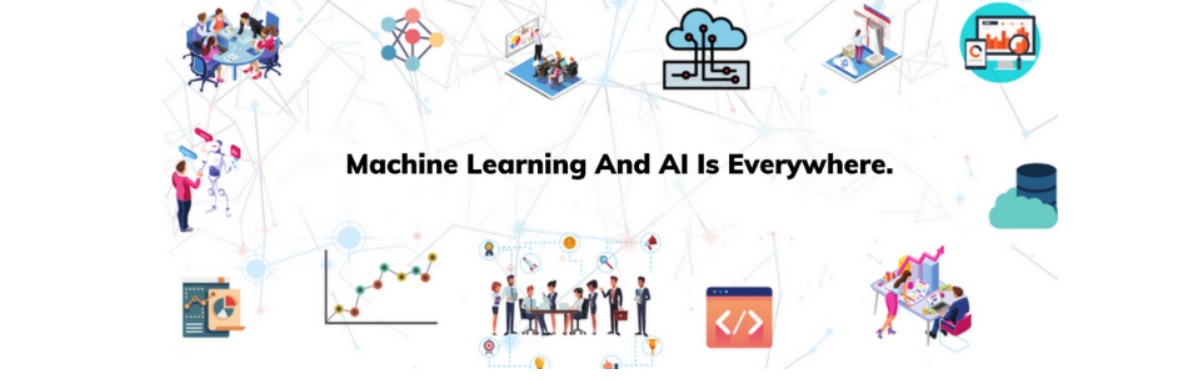

# The Future Development of AI

## Development of Ethics

### Prevent AI bias

1. Learn more about training data sets in advance

Academic and business data sets inevitably have biased classifications and labels, which will cause deviation to the algorithm. Before using data, we need to understand these classifications and labels. In this way, we will not be surprised by the biased results and can correct them.

2. Build a diversified work team

Group members from different cultures, races and gender backgrounds will bring different ideas. This is very helpful to find problems before the model is put into production. A group of team members with completely similar backgrounds find it difficult to detect their own bias.

3. Consider diversified end users

AI products are not facing small R&D teams, but a large number of different customers. AI R&D should have compassion and empathy. Avoid AI biases by learning how to predict how people who are different from you will interact with your technology and what problems they may have in doing so.

4. Dynamic and timely improvement system

Open a forum or message board to get feedback and use it to improve the AI model. In addition to using customer feedback, it is also necessary to use independent professional personnel to review whether there is AI bias. Continuously iterate to improve accuracy.

Bias in AI: What it is, Types, Examples & 6 Ways to Fix it 
https://research.aimultiple.com/ai-bias/

### Moral code

AI ethics is a set of guidelines on the design and results of artificial intelligence. Because human beings have various cognitive biases, these inherent biases will be reflected in AI later. AI is magnifying and expanding these prejudices at an unprecedented rate.

Leading companies in the AI field are already developing and refining these guidelines to prevent costly penalties. Like all technological advances, innovation in emerging areas often exceeds the speed and intensity of government regulation. With the development of appropriate expertise in the government industry, we can expect more AI agreements to be followed by companies, so that they can avoid any violation of human rights and civil liberties.

Biomedicine has also encountered many ethical practical problems, such as cloning technology. Doctors and lawyers have a systematic code of ethics after years of development. It is necessary to take an oath when taking office, and any violation of the code of ethics is a serious dereliction of duty. Artificial intelligence technology is developing rapidly, but the rules and regulations on ethics are not perfect. Therefore, a series of detailed code of ethics for AI engineers may be the trend of AI development in the future.

AI ethics (AI code of ethics) 
https://www.techtarget.com/whatis/definition/AI-code-of-ethics

### Accountability system

Obligations to assess: Recent trends in AI accountability regulations
https://www.cell.com/patterns/fulltext/S2666-3899(22)00233-1

## Social Employment Development


### Create new employment opportunities
The demand for AI occupations is growing steadily.

10 Awesome & High-Paying AI Careers to Pursue in 2023
https://www.springboard.com/blog/data-science/careers-in-ai/

### Corporate social responsibility

Just like the impact of the industrial revolution on a large number of individual workers, the growing popularity of AI will reduce the demand for white-collar employees and even high-quality professional posts. For example, automatic text processing by artificial intelligence has largely covered part of HR work. The development and progress of AI painting has caused a great stir in the painter circle. Image recognition tools have surpassed doctors in the detection of skin cancer and some specific diseases.

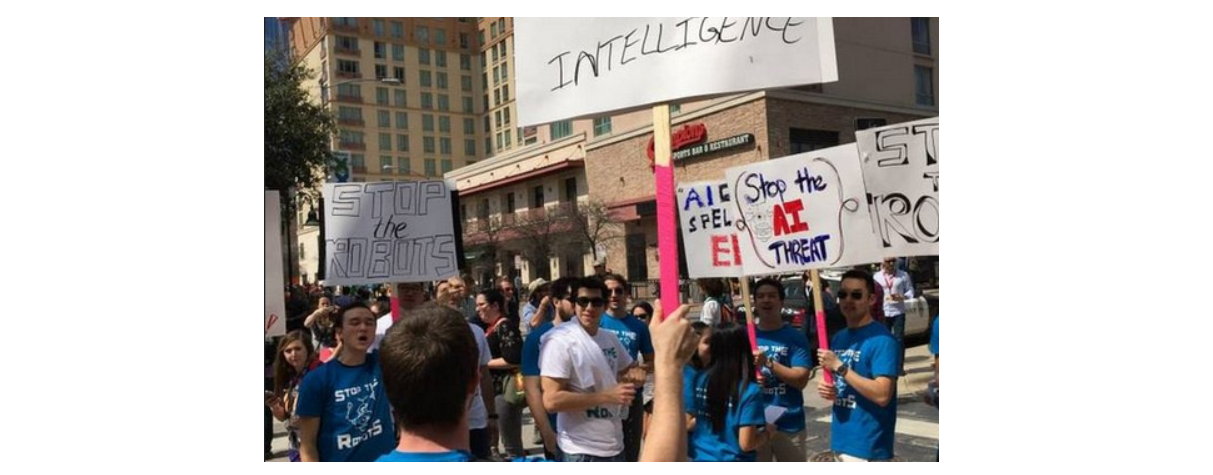

An A.I.-Generated Picture Won an Art Prize. Artists Aren’t Happy.
https://www.nytimes.com/2022/09/02/technology/ai-artificial-intelligence-artists.html

People who lose their jobs because of AI need to be compensated. Perhaps the company will use a certain proportion of the funds saved through automation to train employees to engage in new jobs that cannot be automated or to pay compensation. Perhaps the government will introduce welfare policies to eliminate job inequality. This is a real problem that AI will face in the future.

### Limit automation

AI development brings not only progress and convenience, but also a world where only a few people can work. At some point in the future, governments may restrict automation or legislate on automation.

## International Coordinated Development

AI development brings global opportunities and challenges. Governments around the world have encouraged the strategy of increasing AI research at home, which may lead to the fragmentation and problems of the global governance pattern.

For the sake of their own national economic development, the governments of all countries will not be inferior in the world, and may spontaneously relax the supervision of AI, which will evolve into bottom competition. The vicious competition will increase the biased and even harmful AI system.

Therefore, it is essential to establish global governance institutions to guide these changes in a favorable direction. Therefore, it is essential for AI to develop international standards.How do countries balance economic growth and personal privacy?

Finally, international coordination is needed in the control of illegal activities in the AI field. The nature of AI makes localization solutions unlikely to be effective for a long time. Countries need to establish prevention systems together.

Strengthening international cooperation on AI
https://www.brookings.edu/research/strengthening-international-cooperation-on-ai/

# The Future of AI and Society

**Background Reading**

https://builtin.com/artificial-intelligence/artificial-intelligence-future

https://www.pewresearch.org/internet/2018/12/10/artificial-intelligence-and-the-future-of-humans/

https://www.vice.com/en/article/y3pezm/scientists-increasingly-cant-explain-how-ai-works

https://futureoflife.org/data/documents/research_priorities.pdf

https://en.wikipedia.org/wiki/Open_Letter_on_Artificial_Intelligence


https://news.harvard.edu/gazette/story/2020/10/ethical-concerns-mount-as-ai-takes-bigger-decision-making-role/

The Ethical Algorithm, Chapter 5

When Will AI Exceed Human Performance? Evidence from AI Experts - https://arxiv.org/pdf/1705.08807.pdf

**Is it unreasonable to be afraid of AI?**

Hollywood loves to imagine future AI in a negative light. From The Terminator to Age of Ultron, AI in media is characterized by machines that seek to extinguish humanity. Is this a realistic risk? MIT physics professor Max Tegmark argues that AI itself is not what we should fear. Instead, our worries should center on the use of AI by people with bad intentions: “The real threat from AI isn’t malice, like in silly Hollywood movies, but competence — AI accomplishing goals that just aren’t aligned with ours.”

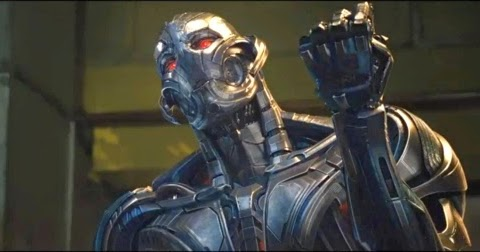

**Problems with Current AI**

Most of the issues we see with machine learning stem from the lack of transparency into how an algorithm makes decisions. Without biases directly visible in algorithms, it may seem that machine learning makes purely objective decisions. As Michael Sandel, professor of politcal philosophy at Harvard, puts it, "AI not only replicates human biases, it confers on these biases a kind of scientific credibility. It makes it seem that these predictions and judgments have an objective status". <!-- https://news.harvard.edu/gazette/story/2020/10/ethical-concerns-mount-as-ai-takes-bigger-decision-making-role/-->
Given the issues we see today with the use of artificial intelligence, it is not unreasonable to think that these problems would compound in the future with more powerful machines, and as AI becomes more ubiquitous in society.

**Future Applications of AI**

Like any tool, AI can be used for good or for bad. AI expert Kai-Fu Lee predicts that within 20 years, many routine jobs may be replaced by AI. This could be liberating or devastating, depending on how society distibutes the benefits from AI. If large companies replace workers with AI, it could be an opportunity for those workers to learn new skills or enjoy more free time, or they could be left jobless while the company reaps the profits. In the past, technological improvements have increased productivity, but not resulted in people working less. The elimination of mundane and routine tasks by AI could fund a universal basic income system where everyone can reap the benefits of automation, or it could futher the division between the rich and the poor.

Researchers at the Future of Humanity Institute at Oxford University surveyed researchers about when they believe AI will replace humans at certain tasks. The results are shown below.
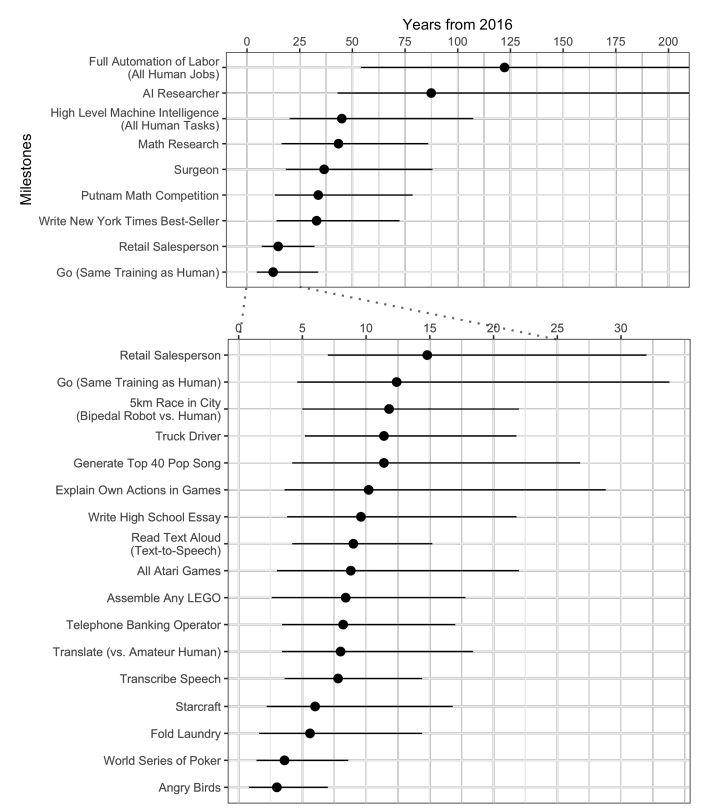

It may be surprising to see creative exploits such as writing books and songs likely to be able to be achieved by AI in the next few decades. This brings up the question of what constitutes creativity, and if there is something that sets human brains apart from highly complex computer programs. Is there some aspect of humanity that could never be replaced by AI? Or are our brains nothing but highly optimized machines?

**The Singularity**

Some minds in tech, including Elon Musk and Stephen Hawking, worry that if a computer could gain the ability to build a better computer, there would be an "intelligence explosion", resulting in an ultraintelligent machine that far surpasses human capabilities. Researchers call this point the singularity. "This is a problem because it can be hard to anticipate exactly what a computer is programmed to do in a particular situation" (The Ethical Algorithm, pg181). As we have seen in this class, it's easy to tell a computer what to do, but it's difficult to tell a computer how to do it. 
<div>
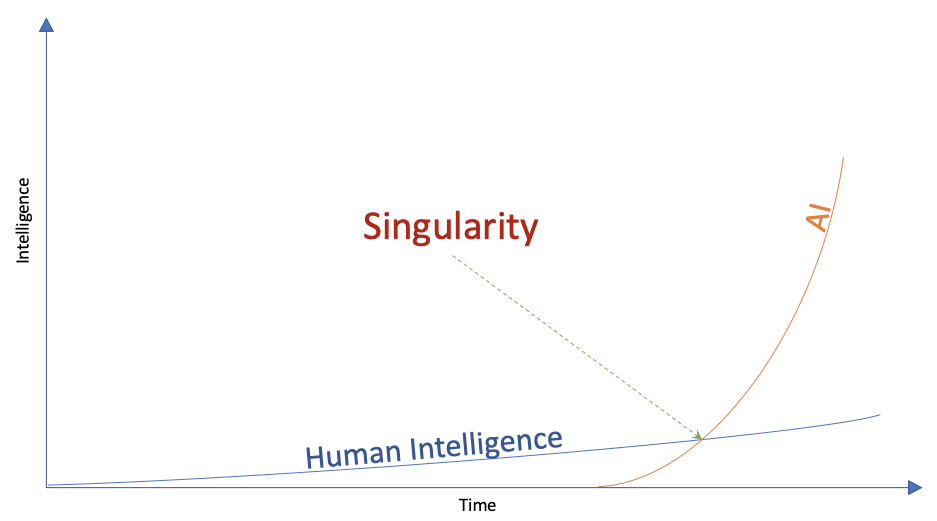
</div>

But would there be an explosion? What if the computer could build a better computer, but not as quickly as humans could?

Whether or not there is a risk of an intelligence explosion all depends on the rate at which a computer could improve itself. If there is a diminishing rate of returns on research, there will not be an exponential rate of progress. However, if the computer's returns on research are linear, or worse exponential, we will reach a point where there is an unbelievable explosion in the computer's capailities. Some researchers argue that we should be prepared for this explosion and should start having preparatory conversations now in order to give humanity it's best chance. Others say that we are not currently equipped to have a productive conversation about the singularity, since we have no idea what will happen. 


**Questions for Consideration**

★What tasks in your day-to-day life would you like to see automated?

★What jobs do you think could never be replaced by AI?

★How should society handle workers displaced by AI?

★What separates humans from machines? Could a machine every truly replicate the human brain?

★AI enables an increased level of personalization in digital experiences. Is this a good thing?

★How can AI researchers increase visibility into how their algorithms work and avoid unintended consequences? 

★Is it fair to make decisions in a way that humans can't understand?